# Imports, dictionary & loading datasets

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
import collections
collections.Iterable = collections.abc.Iterable
from sklearn.decomposition import PCA
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import tkinter as tk
from sklearn.manifold import TSNE



from sklearn.preprocessing import PolynomialFeatures



In [2]:
# Set display options to show numeric values without scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
plt.rcParams.update({
    'font.size': 14,          # Standard-Schriftgröße
    'axes.titlesize': 22,     # Titel-Größe
    'axes.labelsize': 18,     # Achsenbeschriftungsgröße
    'xtick.labelsize': 14,    # Beschriftungsgröße der x-Achse
    'ytick.labelsize': 14     # Beschriftungsgröße der y-Achse
})

In [4]:
ISO3166 = {
    'AD': ['Andorra', 'Andorra'],
    'AE': ['United Arab Emirates', 'Vereinigte Arabische Emirate'],
    'AF': ['Afghanistan', 'Afghanistan'],
    'AG': ['Antigua & Barbuda', 'Antigua und Barbuda'],
    'AI': ['Anguilla', 'Anguilla'],
    'AL': ['Albania', 'Albanien'],
    'AM': ['Armenia', 'Armenien'],
    'AN': ['Netherlands Antilles', 'Niederländische Antillen'],
    'AO': ['Angola', 'Angola'],
    'AQ': ['Antarctica', 'Antarktis'],
    'AR': ['Argentina', 'Argentinien'],
    'AS': ['American Samoa', 'Amerikanisch-Samoa'],
    'AT': ['Austria', 'Österreich'],
    'AU': ['Australia', 'Australien'],
    'AW': ['Aruba', 'Aruba'],
    'AZ': ['Azerbaijan', 'Aserbaidschan'],
    'BA': ['Bosnia and Herzegovina', 'Bosnien und Herzegowina'],
    'BB': ['Barbados', 'Barbados'],
    'BD': ['Bangladesh', 'Bangladesch'],
    'BE': ['Belgium', 'Belgien'],
    'BF': ['Burkina Faso', 'Burkina Faso'],
    'BG': ['Bulgaria', 'Bulgarien'],
    'BH': ['Bahrain', 'Bahrain'],
    'BI': ['Burundi', 'Burundi'],
    'BJ': ['Benin', 'Benin'],
    'BM': ['Bermuda', 'Bermuda'],
    'BN': ['Brunei Darussalam', 'Brunei'],
    'BO': ['Bolivia', 'Bolivien', 'Bolivia (Plurinational State of)'],
    'BR': ['Brazil', 'Brasilien'],
    'BS': ['Bahama', 'Bahamas'],
    'BT': ['Bhutan', 'Bhutan'],
    'BU': ['Burma (no longer exists)', 'Birma (nicht mehr existiert)'],
    'BV': ['Bouvet Island', 'Bouvetinsel'],
    'BW': ['Botswana', 'Botswana'],
    'BY': ['Belarus', 'Weißrussland'],
    'BZ': ['Belize', 'Belize'],
    'CA': ['Canada', 'Kanada'],
    'CC': ['Cocos (Keeling) Islands', 'Kokosinseln'],
    'CF': ['Central African Republic', 'Zentralafrikanische Republik'],
    'CG': ['Congo', 'Kongo','Democratic Republic of the Congo', 'Congo (Brazzaville)', 'Congo (Kinshasa)'],
    'CH': ['Switzerland', 'Schweiz'],
    'CI': ["Côte D'ivoire (Ivory Coast)", 'Elfenbeinküste', 'Ivory Coast', "Côte d'Ivoire"],
    'CK': ['Cook Iislands', 'Cookinseln'],
    'CL': ['Chile', 'Chile'],
    'CM': ['Cameroon', 'Kamerun'],
    'CN': ['China', 'China', 'China, mainland'],
    'CO': ['Colombia', 'Kolumbien'],
    'CR': ['Costa Rica', 'Costa Rica'],
    'CS': ['Serbia', 'Montenegro', 'Serbien', 'Montenegro'],
    'CU': ['Cuba', 'Kuba'],
    'CV': ['Cape Verde', 'Kap Verde'],
    'CX': ['Christmas Island', 'Weihnachtsinsel'],
    'CY': ['Cyprus', 'Zypern'],
    'CZ': ['Czech Republic', 'Czechia', 'Tschechische Republik', 'Tschechien'],
    'DD': ['German Democratic Republic (no longer exists)', 'Deutsche Demokratische Republik (nicht mehr existiert)'],
    'DE': ['Germany', 'Deutschland'],
    'DJ': ['Djibouti', 'Dschibuti'],
    'DK': ['Denmark', 'Dänemark'],
    'DM': ['Dominica', 'Dominica'],
    'DO': ['Dominican Republic', 'Dominikanische Republik'],
    'DZ': ['Algeria', 'Algerien'],
    'EC': ['Ecuador', 'Ecuador'],
    'EE': ['Estonia', 'Estland'],
    'EG': ['Egypt', 'Ägypten'],
    'EH': ['Western Sahara', 'Westsahara'],
    'ER': ['Eritrea', 'Eritrea'],
    'ES': ['Spain', 'Spanien'],
    'ET': ['Ethiopia', 'Äthiopien', 'Ethiopia PDR'],
    'FI': ['Finland', 'Finnland'],
    'FJ': ['Fiji', 'Fidschi'],
    'FK': ['Falkland Islands (Malvinas)', 'Falklandinseln (Malwinen)'],
    'FM': ['Micronesia', 'Mikronesien'],
    'FO': ['Faroe Islands', 'Färöer'],
    'FR': ['France', 'Frankreich'],
    'FX': ['France, Metropolitan', 'Frankreich, Metropolitan'],
    'GA': ['Gabon', 'Gabun'],
    'GB': ['United Kingdom', 'Vereinigtes Königreich'],
    'GD': ['Grenada', 'Grenada'],
    'GE': ['Georgia', 'Georgien'],
    'GF': ['French Guiana', 'Französisch-Guayana'],
    'GH': ['Ghana', 'Ghana'],
    'GI': ['Gibraltar', 'Gibraltar'],
    'GL': ['Greenland', 'Grönland'],
    'GM': ['Gambia', 'Gambia'],
    'GN': ['Guinea', 'Guinea'],
    'GP': ['Guadeloupe', 'Guadeloupe'],
    'GQ': ['Equatorial Guinea', 'Äquatorialguinea'],
    'GR': ['Greece', 'Griechenland'],
    'GS': ['South Georgia and the South Sandwich Islands', 'Südgeorgien und die Südlichen Sandwichinseln'],
    'GT': ['Guatemala', 'Guatemala'],
    'GU': ['Guam', 'Guam'],
    'GW': ['Guinea-Bissau', 'Guinea-Bissau'],
    'GY': ['Guyana', 'Guyana'],
    'HK': ['Hong Kong', 'Hongkong'],
    'HM': ['Heard & McDonald Islands', 'Heard- und McDonald-Inseln'],
    'HN': ['Honduras', 'Honduras'],
    'HR': ['Croatia', 'Kroatien'],
    'HT': ['Haiti', 'Haiti'],
    'HU': ['Hungary', 'Ungarn'],
    'ID': ['Indonesia', 'Indonesien'],
    'IE': ['Ireland', 'Irland'],
    'IL': ['Israel', 'Israel'],
    'IN': ['India', 'Indien'],
    'IO': ['British Indian Ocean Territory', 'Britisches Territorium im Indischen Ozean'],
    'IQ': ['Iraq', 'Irak'],
    'IR': ['Iran (Islamic Republic of)', 'Iran'],
    'IS': ['Iceland', 'Island'],
    'IT': ['Italy', 'Italien'],
    'JM': ['Jamaica', 'Jamaika'],
    'JO': ['Jordan', 'Jordanien'],
    'JP': ['Japan', 'Japan'],
    'KE': ['Kenya', 'Kenia'],
    'KG': ['Kyrgyzstan', 'Kirgisistan'],
    'KH': ['Cambodia', 'Kambodscha'],
    'KI': ['Kiribati', 'Kiribati'],
    'KM': ['Comoros', 'Komoren'],
    'KN': ['St. Kitts and Nevis', 'St. Kitts und Nevis'],
    'KP': ['North Korea', 'Nordkorea', "Democratic People's Republic of Korea"],
    'KR': ['South Korea', 'Südkorea'],
    'KW': ['Kuwait', 'Kuwait'],
    'KY': ['Cayman Islands', 'Kaimaninseln'],
    'KZ': ['Kazakhstan', 'Kasachstan'],
    'LA': ["Lao People's Democratic Republic", 'Laos'],
    'LB': ['Lebanon', 'Libanon'],
    'LC': ['Saint Lucia', 'St. Lucia'],
    'LI': ['Liechtenstein', 'Liechtenstein'],
    'LK': ['Sri Lanka', 'Sri Lanka'],
    'LR': ['Liberia', 'Liberia'],
    'LS': ['Lesotho', 'Lesotho'],
    'LT': ['Lithuania', 'Litauen'],
    'LU': ['Luxembourg', 'Luxemburg'],
    'LV': ['Latvia', 'Lettland'],
    'LY': ['Libya', 'Libyen'],
    'MA': ['Morocco', 'Marokko'],
    'MC': ['Monaco', 'Monaco'],
    'MD': ['Moldova', 'Moldawien', 'Republic of Moldova'],
    'MG': ['Madagascar', 'Madagaskar'],
    'MH': ['Marshall Islands', 'Marshallinseln'],#
    'MK': ['North Macedonia', 'Nordmazedonien'],
    'ML': ['Mali', 'Mali'],
    'MN': ['Mongolia', 'Mongolei'],
    'MM': ['Myanmar', 'Myanmar'],
    'MO': ['Macau', 'Macau'],
    'MP': ['Northern Mariana Islands', 'Nördliche Marianen'],
    'MQ': ['Martinique', 'Martinique'],
    'MR': ['Mauritania', 'Mauretanien'],
    'MS': ['Montserrat', 'Montserrat'],
    'MT': ['Malta', 'Malta'],
    'MU': ['Mauritius', 'Mauritius'],
    'MV': ['Maldives', 'Malediven'],
    'MW': ['Malawi', 'Malawi'],
    'MX': ['Mexico', 'Mexiko'],
    'MY': ['Malaysia', 'Malaysia'],
    'MZ': ['Mozambique', 'Mosambik'],
    'NA': ['Namibia', 'Namibia'],
    'NC': ['New Caledonia', 'Neukaledonien'],
    'NE': ['Niger', 'Niger'],
    'NF': ['Norfolk Island', 'Norfolkinsel'],
    'NG': ['Nigeria', 'Nigeria'],
    'NI': ['Nicaragua', 'Nicaragua'],
    'NL': ['Netherlands', 'Niederlande'],
    'NO': ['Norway', 'Norwegen'],
    'NP': ['Nepal', 'Nepal'],
    'NR': ['Nauru', 'Nauru'],
    'NT': ['Neutral Zone (no longer exists)', 'Neutralzone (existiert nicht mehr)'],
    'NU': ['Niue', 'Niue'],
    'NZ': ['New Zealand', 'Neuseeland'],
    'OM': ['Oman', 'Oman'],
    'PA': ['Panama', 'Panama'],
    'PE': ['Peru', 'Peru'],
    'PF': ['French Polynesia', 'Französisch-Polynesien'],
    'PG': ['Papua New Guinea', 'Papua-Neuguinea'],
    'PH': ['Philippines', 'Philippinen'],
    'PK': ['Pakistan', 'Pakistan'],
    'PL': ['Poland', 'Polen'],
    'PM': ['St. Pierre & Miquelon', 'St. Pierre und Miquelon'],
    'PN': ['Pitcairn', 'Pitcairn'],
    'PS': ['Palestine', 'Palestina', 'State of Palestine'],
    'PR': ['Puerto Rico', 'Puerto Rico'],
    'PT': ['Portugal', 'Portugal'],
    'PW': ['Palau', 'Palau'],
    'PY': ['Paraguay', 'Paraguay'],
    'QA': ['Qatar', 'Katar'],
    'RE': ['Réunion', 'Réunion'],
    'RO': ['Romania', 'Rumänien'],
    'RU': ['Russian Federation', 'Russische Föderation', 'Russia', 'Russland'],
    'RW': ['Rwanda', 'Ruanda'],
    'SA': ['Saudi Arabia', 'Saudi-Arabien'],
    'SB': ['Solomon Islands', 'Salomonen'],
    'SC': ['Seychelles', 'Seychellen'],
    'SD': ['Sudan', 'Sudan', 'Sudan (former)'],
    'SE': ['Sweden', 'Schweden'],
    'SG': ['Singapore', 'Singapur'],
    'SH': ['St. Helena', 'St. Helena'],
    'SI': ['Slovenia', 'Slowenien'],
    'SJ': ['Svalbard & Jan Mayen Islands', 'Svalbard und Jan Mayen'],
    'SK': ['Slovakia', 'Slowakei'],
    'SL': ['Sierra Leone', 'Sierra Leone'],
    'SM': ['San Marino', 'San Marino'],
    'SN': ['Senegal', 'Senegal'],
    'SO': ['Somalia', 'Somalia'],
    'SR': ['Suriname', 'Suriname'],
    'SS': ['South Sudan','Südsudan'],
    'ST': ['Sao Tome & Principe', 'São Tomé und Príncipe'],
    'SU': ['Union of Soviet Socialist Republics (no longer exists)', 'Sowjetunion (existiert nicht mehr)'],
    'SV': ['El Salvador', 'El Salvador'],
    'SY': ['Syrian Arab Republic', 'Syria', 'Syrien'],
    'SZ': ['Swaziland', 'Swasiland', 'Eswatini'],
    'TC': ['Turks & Caicos Islands', 'Turks- und Caicosinseln'],
    'TD': ['Chad', 'Tschad'],
    'TF': ['French Southern Territories', 'Französische Süd- und Antarktisgebiete'],
    'TG': ['Togo', 'Togo'],
    'TH': ['Thailand', 'Thailand'],
    'TJ': ['Tajikistan', 'Tadschikistan'],
    'TK': ['Tokelau', 'Tokelau'],
    'TM': ['Turkmenistan', 'Turkmenistan'],
    'TN': ['Tunisia', 'Tunesien'],
    'TO': ['Tonga', 'Tonga'],
    'TP': ['East Timor', 'Osttimor'],
    'TR': ['Turkey', 'Türkei', 'Turkiye'],
    'TT': ['Trinidad & Tobago', 'Trinidad und Tobago', 'Trinidad and Tobago'],
    'TV': ['Tuvalu', 'Tuvalu'],
    'TW': ['Taiwan, Province of China', 'Taiwan', 'China, Taiwan Province of', 'Taiwan Province of China'],
    'TZ': ['Tanzania, United Republic of', 'Tansania', 'Tanzania', 'United Republic of Tanzania'],
    'UA': ['Ukraine', 'Ukraine'],
    'UG': ['Uganda', 'Uganda'],
    'UK': ['United Kingdom', 'Vereinigtes Königreich'],
    'UM': ['United States Minor Outlying Islands', 'United States Minor Outlying Islands'],
    'US': ['United States of America', 'United States', 'Vereinigte Staaten von Amerika', 'USA'],
    'UY': ['Uruguay', 'Uruguay'],
    'UZ': ['Uzbekistan', 'Usbekistan'],
    'VA': ['Vatican City State (Holy See)', 'Holy See', 'Vatikanstadt'],
    'VC': ['St. Vincent & the Grenadines', 'St. Vincent und die Grenadinen'],
    'VE': ['Venezuela', 'Venezuela'],
    'VG': ['British Virgin Islands', 'Britische Jungferninseln'],
    'VI': ['United States Virgin Islands', 'Amerikanische Jungferninseln'],
    'VN': ['Viet Nam', 'Vietnam'],
    'VU': ['Vanuatu', 'Vanuatu'],
    'WF': ['Wallis & Futuna Islands', 'Wallis und Futuna'],
    'WS': ['Samoa', 'Samoa'],
    'XK': ['Kosovo'],
    'YE': ['Yemen', 'Jemen'],
    'YT': ['Mayotte', 'Mayotte'],
    'YU': ['Yugoslavia', 'Jugoslawien'],
    'ZA': ['South Africa', 'Südafrika'],
    'ZM': ['Zambia', 'Sambia'],
    'ZR': ['Zaire', 'Zaire'],
    'ZW': ['Zimbabwe', 'Simbabwe'],
    'ZZ': ['Unknown or unspecified country', 'Unbekanntes oder nicht spezifiziertes Land'],
}

In [5]:
# reveresed dictionary for country names for renaming
reversed_ISO3166 = {}
for code, names in ISO3166.items():
    country_name = names[0]  # Hier wird der vollständige Ländername ausgewählt
    reversed_ISO3166[country_name] = code

In [6]:
person = "wilma"
if person == "dario":

    your_path = "data_VisProj/"
    
else:    
    your_path = r"/home/wilma/visualization/forked/VisualizationProj23/Data/"

df_happiness = pd.read_csv(your_path + 'World Happiness Report.csv')

df_death_causes = pd.read_csv(your_path + 'causes of death till 2019.csv', header=1)

df_internet_users = pd.read_csv(your_path + 'Internet Users percent of population.csv')

df_population = pd.read_csv(your_path + 'population.csv')

df_gdp = pd.read_csv(your_path + 'GDP DATA.csv', header=2)

df_inequality = pd.read_csv(your_path + 'Income_inequality.csv', encoding='latin1')

df_environment = pd.read_csv(your_path + 'Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding='latin1')

df_latitude_longitude = pd.read_csv(your_path + "latitude_longitude.csv", encoding='latin1')

In [7]:
# needs to be changed before pre-processing
df_latitude_longitude = df_latitude_longitude.drop(columns='country')
df_latitude_longitude.rename(columns={'name': 'country'}, inplace=True)

Liste, für dataframes, die nach country columns gecheckt und ggf encoded werden sollen. 

# Pre-Processing

## Check usability of data and set naming conventions

In [8]:
# rename columns such that it is possible to use dot access

df_happiness.rename(columns={'Country Name': 'country',
                             'Life Ladder': 'happiness_score',
                             'Freedom To Make Life Choices': 'freedom',
                             'Perceptions Of Corruption': 'perception_corruption',
                             'Log GDP Per Capita': 'log_gdp',
                             'Social Support': 'social_support',
                             'Healthy Life Expectancy At Birth': 'birth_health',
                             'Regional Indicator': 'regional_indicator',
                             'Confidence In National Government': 'government_confidence',
                             'Generosity': 'generosity', 'Year': 'year'}, inplace=True)

In [9]:
dataframes = ['df_happiness', 'df_death_causes', 'df_internet_users', 'df_population', 'df_gdp', 'df_inequality', 'df_environment', 'df_latitude_longitude']

In [10]:
# change different names for "country" to "country" to match dataframes correctly

df_with_country_column = []

for df_name in dataframes:
    df = globals()[df_name]
    column_name = None
    for col in df.columns:
        if col.lower() in ['country', 'country name', 'country/region', 'area']:
            column_name = col
            break
    if column_name is not None:
        # Make a copy of the dataframe slice to avoid SettingWithCopyWarning
        df = df[df[column_name].isin(df_happiness['country'].unique())].copy()
        df.rename(columns={column_name: 'country'}, inplace=True)
        globals()[df_name] = df
        df_with_country_column.append(df_name)

In [11]:
# Flatten the ISO3166 dictionary to handle lists in values
flattened_ISO3166 = {}
for key, value in ISO3166.items():
    if isinstance(value, list):
        for sub_value in value:
            flattened_ISO3166[sub_value.lower()] = key
    else:
        flattened_ISO3166[value.lower()] = key

# Create a set to keep track of unknown country values
unknown_countries = set()

# Iterate through the dataframes and update the 'country' column
for df_name in df_with_country_column:
    df = globals()[df_name]
    country_column = df['country']
    for index, row in df.iterrows():
        country = row.country
        
        if isinstance(country, list):
            for i, sub_country in enumerate(country):
                if sub_country.lower() in flattened_ISO3166:
                    df.loc[index, 'country'][i] = flattened_ISO3166[sub_country.lower()]
                else:
                    if sub_country not in unknown_countries:
                        print(f"Unknown country value: {sub_country}")
                        unknown_countries.add(sub_country)
        else:
            if country.lower() in flattened_ISO3166:
                df.loc[index, 'country'] = flattened_ISO3166[country.lower()]
            else:
                if country not in unknown_countries:
                    print(f"Unknown country value: {country}")
                    unknown_countries.add(country)
    globals()[df_name] = df

Unknown country value: Hong Kong S.A.R. of China
Unknown country value: Somaliland region


In [12]:
# reverse country encoding but to just one uniform naming convention

# Flatten the ISO3166 dictionary to handle lists in values
flattened_reversed_ISO3166 = {}
for key, value in reversed_ISO3166.items():
    if isinstance(value, list):
        for sub_value in value:
            flattened_reversed_ISO3166[sub_value.lower()] = key
    else:
        flattened_reversed_ISO3166[value.lower()] = key

# Create a set to keep track of unknown country values
unknown_countries = set()

# Iterate through the dataframes and update the 'country' column
for df_name in df_with_country_column:
    df = globals()[df_name]
    country_column = df['country']
    for index, row in df.iterrows():
        country = row.country
        
        if isinstance(country, list):
            for i, sub_country in enumerate(country):
                if sub_country.lower() in flattened_reversed_ISO3166:
                    df.loc[index, 'country'][i] = flattened_reversed_ISO3166[sub_country.lower()]
                else:
                    if sub_country not in unknown_countries:
                        unknown_countries.add(sub_country)
        else:
            if country.lower() in flattened_reversed_ISO3166:
                df.loc[index, 'country'] = flattened_reversed_ISO3166[country.lower()]
            else:
                if country not in unknown_countries:
                    unknown_countries.add(country)
    globals()[df_name] = df

In [13]:
# identify the countries that exist in all the data sets

common_countries = set(df_happiness['country'].unique())

for df_name in dataframes:
    df = globals()[df_name]
    column_name = None
    for col in df.columns:
        if col.lower() == 'country' or col.lower() == 'country name':
            column_name = col
            break
    if column_name is not None:
        countries = set(df[column_name].unique())
        common_countries = common_countries.intersection(countries)

common_countries_list = ", ".join(sorted(common_countries))

print("Common Countries:", common_countries_list)
print()
print("These countries appear in all datasets.")

Common Countries: Afghanistan, Albania, Algeria, Angola, Argentina, Armenia, Australia, Austria, Azerbaijan, Bahrain, Bangladesh, Belarus, Belgium, Belize, Benin, Bhutan, Bosnia and Herzegovina, Botswana, Brazil, Bulgaria, Burkina Faso, Burundi, Cambodia, Cameroon, Canada, Central African Republic, Chad, Chile, China, Colombia, Comoros, Costa Rica, Croatia, Cuba, Cyprus, Denmark, Djibouti, Dominican Republic, Ecuador, El Salvador, Estonia, Ethiopia, Finland, France, Gabon, Georgia, Germany, Ghana, Greece, Guatemala, Guinea, Guyana, Haiti, Honduras, Hungary, Iceland, India, Indonesia, Iraq, Ireland, Israel, Italy, Jamaica, Japan, Jordan, Kazakhstan, Kenya, Kuwait, Latvia, Lebanon, Lesotho, Liberia, Libya, Lithuania, Luxembourg, Madagascar, Malawi, Malaysia, Maldives, Mali, Malta, Mauritania, Mauritius, Mexico, Mongolia, Morocco, Mozambique, Namibia, Nepal, Netherlands, New Zealand, Nicaragua, Niger, Nigeria, Norway, Oman, Pakistan, Panama, Paraguay, Peru, Philippines, Poland, Portugal, 

## Clean happiness dataset

In [14]:
# Countries with data that starts late or ends early get removed

# Gruppiere den DataFrame nach 'country' und ermittele den kleinsten und größten Wert von 'year'
year_range = df_happiness.groupby('country')['year'].agg(['min', 'max'])

# Extrahiere Länder, die die Bedingungen erfüllen
countries_to_remove = year_range[(year_range['min'] > 2006) | (year_range['max'] < 2018)].index

# Entferne die betroffenen Länder aus dem DataFrame
df_happiness = df_happiness[~df_happiness['country'].isin(countries_to_remove)]

In [15]:
# Finde das früheste und späteste Jahr für jeden Land
earliest_years = df_happiness.groupby('country')['year'].min()
latest_years = df_happiness.groupby('country')['year'].max()

# Erstelle eine Liste aller möglichen Jahre zwischen dem frühesten und spätesten Jahr
all_years = []
for country in df_happiness['country'].unique():
    years_range = range(earliest_years[country], latest_years[country] + 1)
    all_years.extend([(country, year) for year in years_range])

# Erstelle einen neuen Dataframe mit allen Kombinationen von Land und Jahr
df_all_combinations = pd.DataFrame(all_years, columns=['country', 'year'])

# Fülle fehlende Einträge basierend auf den vorhandenen Daten im ursprünglichen Dataframe auf
df_happiness = df_all_combinations.merge(df_happiness, on=['country', 'year'], how='left')

columns_to_fill = [
    'happiness_score', 'log_gdp', 'social_support', 'birth_health', 
    'freedom', 'generosity', 'perception_corruption', 'Positive Affect', 
    'Negative Affect', 'government_confidence'
]

for i in range(1, len(df_happiness)):
    for column in columns_to_fill:
        if pd.isna(df_happiness[column][i]):
            df_happiness.loc[i, column] = df_happiness.loc[i-1, column]

df_happiness.head()

,country,year,regional_indicator,happiness_score,log_gdp,social_support,birth_health,freedom,generosity,perception_corruption,Positive Affect,Negative Affect,government_confidence
0,Argentina,2006,Latin America and Caribbean,6.31,9.94,0.94,65.82,0.73,-0.16,0.85,0.75,0.33,0.52
1,Argentina,2007,Latin America and Caribbean,6.07,10.01,0.86,65.94,0.65,-0.14,0.88,0.75,0.28,0.41
2,Argentina,2008,Latin America and Caribbean,5.96,10.04,0.89,66.06,0.68,-0.13,0.86,0.72,0.32,0.29
3,Argentina,2009,Latin America and Caribbean,6.42,9.97,0.92,66.18,0.64,-0.13,0.88,0.76,0.24,0.27
4,Argentina,2010,Latin America and Caribbean,6.44,10.07,0.93,66.30,0.73,-0.13,0.85,0.77,0.21,0.35


In [16]:
# Gruppiere den DataFrame nach 'country' und ermittele den kleinsten und größten Wert von 'year'
year_range = df_happiness.groupby('country')['year'].agg(['min', 'max'])

year_range

,min,max
country,,
Argentina,2006,2022
Armenia,2006,2022
Australia,2005,2022
Austria,2006,2022
Azerbaijan,2006,2019
...,...,...
Uzbekistan,2006,2022
Venezuela,2005,2022
Viet Nam,2006,2022


## Clean additional datasets

In [17]:
# clean internet user data

df_internet_users_clean = df_internet_users.drop(['Country Code'], axis=1)
df_internet_users_clean = df_internet_users_clean.melt(id_vars=['country'], var_name='year', value_name='percent_internet_users')
df_internet_users_clean = df_internet_users_clean.groupby(['country', 'year']).mean().reset_index()
df_internet_users_clean['year'] = df_internet_users_clean['year'].astype(int)

# Finde das früheste und späteste Jahr für jeden Land
earliest_years = df_internet_users_clean.groupby('country')['year'].min()
latest_years = df_internet_users_clean.groupby('country')['year'].max()

# Erstelle eine Liste aller möglichen Jahre zwischen dem frühesten und spätesten Jahr
all_years = []
for country in df_internet_users_clean['country'].unique():
    years_range = range(earliest_years[country], latest_years[country] + 1)
    all_years.extend([(country, year) for year in years_range])

# Erstelle einen neuen Dataframe mit allen Kombinationen von Land und Jahr
df_all_combinations = pd.DataFrame(all_years, columns=['country', 'year'])

# Fülle fehlende Einträge basierend auf den vorhandenen Daten im ursprünglichen Dataframe auf
df_internet_users_clean = df_all_combinations.merge(df_internet_users_clean, on=['country', 'year'], how='left')

for i in range(1, len(df_internet_users_clean)):
    if pd.isna(df_internet_users_clean['percent_internet_users'][i]):
        columns_to_fill = ['percent_internet_users']
        df_internet_users_clean.loc[i, columns_to_fill] = df_internet_users_clean.loc[i-1, columns_to_fill]

df_internet_users_clean.head()

,country,year,percent_internet_users
0,Afghanistan,1990,0.00
1,Afghanistan,1991,0.00
2,Afghanistan,1992,0.00
3,Afghanistan,1993,0.00
4,Afghanistan,1994,0.00


In [18]:
# clean gdp data

df_gdp_clean = df_gdp.drop(['Country Code', 'Indicator Name', 'Indicator Code'], axis=1)
df_gdp_clean = df_gdp_clean.melt(id_vars=['country'], var_name='year', value_name='gdp')
df_gdp_clean = df_gdp_clean.dropna()
df_gdp_clean['gdp'] = df_gdp_clean['gdp'].str.replace(',', '').astype(float)
df_gdp_clean = df_gdp_clean.groupby(['country', 'year']).mean().reset_index()
df_gdp_clean['year'] = df_gdp_clean['year'].astype(int)

# Finde das früheste und späteste Jahr für jeden Land
earliest_years = df_gdp_clean.groupby('country')['year'].min()
latest_years = df_gdp_clean.groupby('country')['year'].max()

# Erstelle eine Liste aller möglichen Jahre zwischen dem frühesten und spätesten Jahr
all_years = []
for country in df_gdp_clean['country'].unique():
    years_range = range(earliest_years[country], latest_years[country] + 1)
    all_years.extend([(country, year) for year in years_range])

# Erstelle einen neuen Dataframe mit allen Kombinationen von Land und Jahr
df_all_combinations = pd.DataFrame(all_years, columns=['country', 'year'])

# Fülle fehlende Einträge basierend auf den vorhandenen Daten im ursprünglichen Dataframe auf
df_gdp_clean = df_all_combinations.merge(df_gdp_clean, on=['country', 'year'], how='left')

for i in range(1, len(df_gdp_clean)):
    if pd.isna(df_gdp_clean['gdp'][i]):
        columns_to_fill = ['gdp']
        df_gdp_clean.loc[i, columns_to_fill] = df_gdp_clean.loc[i-1, columns_to_fill]

df_gdp_clean.head()

,country,year,gdp
0,Afghanistan,1960,537777811.00
1,Afghanistan,1961,548888896.00
2,Afghanistan,1962,546666678.00
3,Afghanistan,1963,751111191.00
4,Afghanistan,1964,800000044.00


In [19]:
# clean population data

specified_columns = ['2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population']
df_population.rename(columns=lambda x: x.split()[0] if x in specified_columns else x, inplace=True)

df_population_clean = df_population[['country', '2022', '2020', '2015', '2010', '2000', 'Area (km²)']]

df_population_clean = df_population_clean.melt(id_vars=['country', 'Area (km²)'], var_name='year', value_name='population')
df_population_clean['year'] = df_population_clean['year'].astype(int)
df_population_clean['population density'] = df_population_clean['population'] / df_population_clean['Area (km²)']

# Sort the dataframe by 'country' and 'year' columns in ascending order
df_population_clean = df_population_clean.sort_values(by=['country', 'year'], ascending=[True, True])

# join latitude and longitude data
df_population_clean = df_population_clean.merge(df_latitude_longitude, on='country', how='inner')
df_population_clean = df_population_clean.reset_index(drop=True)

# Finde das früheste und späteste Jahr für jeden Land
earliest_years = df_population_clean.groupby('country')['year'].min()
latest_years = df_population_clean.groupby('country')['year'].max()

# Erstelle eine Liste aller möglichen Jahre zwischen dem frühesten und spätesten Jahr
all_years = []
for country in df_population_clean['country'].unique():
    years_range = range(earliest_years[country], latest_years[country] + 1)
    all_years.extend([(country, year) for year in years_range])

# Erstelle einen neuen Dataframe mit allen Kombinationen von Land und Jahr
df_all_combinations = pd.DataFrame(all_years, columns=['country', 'year'])

# Fülle fehlende Einträge basierend auf den vorhandenen Daten im ursprünglichen Dataframe auf
df_population_clean = df_all_combinations.merge(df_population_clean, on=['country', 'year'], how='left')

for i in range(1, len(df_population_clean)):
    if pd.isna(df_population_clean['population'][i]):
        columns_to_fill = ['Area (km²)', 'population', 'population density', 'latitude', 'longitude']
        df_population_clean.loc[i, columns_to_fill] = df_population_clean.loc[i-1, columns_to_fill]

df_population_clean.head()

,country,year,Area (km²),population,population density,latitude,longitude
0,Afghanistan,2000,652230.00,19542982.00,29.96,33.94,67.71
1,Afghanistan,2001,652230.00,19542982.00,29.96,33.94,67.71
2,Afghanistan,2002,652230.00,19542982.00,29.96,33.94,67.71
3,Afghanistan,2003,652230.00,19542982.00,29.96,33.94,67.71
4,Afghanistan,2004,652230.00,19542982.00,29.96,33.94,67.71


In [20]:
# clean inequality data

df_inequality_clean = df_inequality[['country', 'year', 'gini_reported']]

# Duplikate entfernen
df_inequality_clean = df_inequality_clean.drop_duplicates(subset=['country', 'year'])
df_inequality_clean = df_inequality_clean.reset_index(drop=True)

# Finde das früheste und späteste Jahr für jeden Land
earliest_years = df_inequality_clean.groupby('country')['year'].min()
latest_years = df_inequality_clean.groupby('country')['year'].max()

# Erstelle eine Liste aller möglichen Jahre zwischen dem frühesten und spätesten Jahr
all_years = []
for country in df_inequality_clean['country'].unique():
    years_range = range(earliest_years[country], latest_years[country] + 1)
    all_years.extend([(country, year) for year in years_range])

# Erstelle einen neuen Dataframe mit allen Kombinationen von Land und Jahr
df_all_combinations = pd.DataFrame(all_years, columns=['country', 'year'])

# Fülle fehlende Einträge basierend auf den vorhandenen Daten im ursprünglichen Dataframe auf
df_inequality_clean = df_all_combinations.merge(df_inequality_clean, on=['country', 'year'], how='left')

for i in range(1, len(df_inequality_clean)):
    if pd.isna(df_inequality_clean['gini_reported'][i]):
        columns_to_fill = ['gini_reported']
        df_inequality_clean.loc[i, columns_to_fill] = df_inequality_clean.loc[i-1, columns_to_fill]

df_inequality_clean.head()

,country,year,gini_reported
0,Afghanistan,2008,29.00
1,Afghanistan,2009,29.00
2,Afghanistan,2010,29.00
3,Afghanistan,2011,29.00
4,Afghanistan,2012,33.00


In [21]:
# clean death causes data

df_death_causes_clean = df_death_causes.rename(columns={'Year': 'year', 'Both sexes': 'Probability (%) of dying between age 30 and exact age 70 from illness (all)', 'Both sexes.1': 'Suicides per 100000 (all)'})

columns_to_remove = ["Male", "Female", "Male.1", "Female.1"]
df_death_causes_clean = df_death_causes_clean.drop(columns=columns_to_remove)

for column in df_death_causes_clean.columns[2:]:
    df_death_causes_clean[column] = df_death_causes_clean[column].str.split('[').str[0].str.strip()
    
# Sort the dataframe by 'country' and 'year' columns in ascending order
df_death_causes_clean = df_death_causes_clean.sort_values(by=['country', 'year'], ascending=[True, True])
df_death_causes_clean = df_death_causes_clean.reset_index(drop=True)

# Convert objects to float
df_death_causes_clean['Probability (%) of dying between age 30 and exact age 70 from illness (all)'] = df_death_causes_clean['Probability (%) of dying between age 30 and exact age 70 from illness (all)'].astype(float)
df_death_causes_clean['Suicides per 100000 (all)'] = df_death_causes_clean['Suicides per 100000 (all)'].astype(float)
    
# Finde das früheste und späteste Jahr für jeden Land
earliest_years = df_death_causes_clean.groupby('country')['year'].min()
latest_years = df_death_causes_clean.groupby('country')['year'].max()

# Erstelle eine Liste aller möglichen Jahre zwischen dem frühesten und spätesten Jahr
all_years = []
for country in df_death_causes_clean['country'].unique():
    years_range = range(earliest_years[country], latest_years[country] + 1)
    all_years.extend([(country, year) for year in years_range])

# Erstelle einen neuen Dataframe mit allen Kombinationen von Land und Jahr
df_all_combinations = pd.DataFrame(all_years, columns=['country', 'year'])

# Fülle fehlende Einträge basierend auf den vorhandenen Daten im ursprünglichen Dataframe auf
df_death_causes_clean = df_all_combinations.merge(df_death_causes_clean, on=['country', 'year'], how='left')

columns_to_fill = [
    'Probability (%) of dying between age 30 and exact age 70 from illness (all)',
    'Suicides per 100000 (all)',
]

for i in range(1, len(df_death_causes_clean)):
    for column in columns_to_fill:
        if pd.isna(df_death_causes_clean[column][i]):
            df_death_causes_clean.loc[i, column] = df_death_causes_clean.loc[i-1, column]

df_death_causes_clean.head()

,country,year,Probability (%) of dying between age 30 and exact age 70 from illness (all),Suicides per 100000 (all)
0,Afghanistan,2000,41.70,4.90
1,Afghanistan,2001,42.10,5.00
2,Afghanistan,2002,42.10,5.00
3,Afghanistan,2003,41.50,5.00
4,Afghanistan,2004,41.40,5.00


In [22]:
# clean environmental data
df_environment_clean = df_environment[df_environment['Element'] == "Temperature change"]
df_environment_clean = df_environment_clean.drop(['Area Code', 'Months Code', 'Element Code', 'Element', 'Unit'], axis=1)
df_environment_clean = df_environment_clean.rename(columns=lambda x: x.replace('Y', ''))
df_environment_clean.rename(columns={'Area': 'country'}, inplace=True)
df_with_country_column.append('df_environment_clean')
df_environment_clean.head()

# Transpose the columns int rows using melt
df_environment_clean = df_environment_clean.melt(id_vars=['country', 'Months'], var_name='year', value_name='temperature_change')

# Rearrange the columns in the desired order'
df_environment_clean = df_environment_clean[['country', 'Months', 'year', 'temperature_change']]

# Group by country and year, calculate mean, and drop Months column
df_environment_clean = df_environment_clean.drop(['Months'], axis=1)
df_environment_clean = df_environment_clean.groupby(['country', 'year']).mean().reset_index()
df_environment_clean['year'] = df_environment_clean['year'].astype(int)

# Finde das früheste und späteste Jahr für jeden Land
earliest_years = df_environment_clean.groupby('country')['year'].min()
latest_years = df_environment_clean.groupby('country')['year'].max()

# Erstelle eine Liste aller möglichen Jahre zwischen dem frühesten und spätesten Jahr
all_years = []
for country in df_environment_clean['country'].unique():
    years_range = range(earliest_years[country], latest_years[country] + 1)
    all_years.extend([(country, year) for year in years_range])

# Erstelle einen neuen Dataframe mit allen Kombinationen von Land und Jahr
df_all_combinations = pd.DataFrame(all_years, columns=['country', 'year'])

# Fülle fehlende Einträge basierend auf den vorhandenen Daten im ursprünglichen Dataframe auf
df_environment_clean = df_all_combinations.merge(df_environment_clean, on=['country', 'year'], how='left')

for i in range(1, len(df_environment_clean)):
    if pd.isna(df_environment_clean['temperature_change'][i]):
        columns_to_fill = ['temperature_change']
        df_environment_clean.loc[i, columns_to_fill] = df_environment_clean.loc[i-1, columns_to_fill]

df_environment_clean.head()

,country,year,temperature_change
0,Afghanistan,1961,0.03
1,Afghanistan,1962,-0.20
2,Afghanistan,1963,0.89
3,Afghanistan,1964,-0.91
4,Afghanistan,1965,-0.05


# Combine data frames

In [23]:
dataframes = [df_happiness, df_death_causes_clean, df_internet_users_clean, df_population_clean, df_gdp_clean, df_inequality_clean, df_environment_clean]

In [24]:
# set equal timeframe for dataframes based on the time frame of df_happiness

# filter years from 2005 to 2018 since thats the times frame covered by all dataframes
filtered_dataframes = []
for df in dataframes:
    filtered_df = df[(df['year'] >= 2006) & (df['year'] <= 2018)]
    filtered_dataframes.append(filtered_df)

# reset index
for idx, df in enumerate(filtered_dataframes):
    filtered_dataframes[idx] = df.reset_index(drop=True)

df_happiness, df_death_causes_clean, df_internet_users_clean, df_population_clean, df_gdp_clean, df_inequality_clean, df_environment_clean = filtered_dataframes

In [25]:
dataframes = [df_death_causes_clean, df_internet_users_clean, df_population_clean, df_gdp_clean, df_inequality_clean, df_environment_clean]

new_dataframes = []

new_names = ['df_death_causes_combined', 'df_internet_users_combined', 'df_population_combined', 'df_gdp_combined', 'df_inequality_combined', 'df_environment_combined']

for df, new_name in zip(dataframes, new_names):
    new_df = pd.merge(df, df_happiness[['year', 'country', 'happiness_score', 'social_support', 'birth_health', 'freedom', 'generosity', 'perception_corruption', 'government_confidence']], on=["year", "country"], how="inner")
    new_dataframes.append(new_df)
    globals()[new_name] = new_df

# Access the new DataFrames
# df_death_causes_combined, df_divorce_rate_combined, df_internet_users_combined, and so on...

In [26]:
# merge population to calculate gdp per person
df_gdp_combined = df_gdp_combined.merge(df_population_combined[['country', 'year', 'population']], on=['year', 'country'], how='inner')
df_gdp_combined['GDP_per_person'] = round(df_gdp_combined['gdp'] / df_gdp_combined['population'],0)
df_gdp_combined = df_gdp_combined.drop(['population'], axis = 1)# find the index of the dataframe with the name 'df_gdp_combined' in new_dataframes
gdp_index = new_names.index('df_gdp_combined')

# update the respective dataframe in the list
new_dataframes[gdp_index] = df_gdp_combined


In [27]:
all_dataframes_combined = df_death_causes_combined

for df in new_dataframes[1:]:
    all_dataframes_combined = pd.merge(all_dataframes_combined, df, on=['year', 'country', 'happiness_score', 'social_support', 'birth_health', 'freedom', 'generosity', 'perception_corruption', 'government_confidence'], how= "inner")
    
all_dataframes_combined.dropna(inplace=True)
all_dataframes_combined = all_dataframes_combined.reset_index(drop=True)
all_dataframes_combined.head()

,country,year,Probability (%) of dying between age 30 and exact age 70 from illness (all),Suicides per 100000 (all),happiness_score,social_support,birth_health,freedom,generosity,perception_corruption,...,percent_internet_users,Area (km²),population,population density,latitude,longitude,gdp,GDP_per_person,gini_reported,temperature_change
0,Argentina,2006,18.30,8.60,6.31,0.94,65.82,0.73,-0.16,0.85,...,20.93,2780400.00,37070774.00,13.33,-38.42,-63.62,232557260817.00,6273.00,46.51,0.58
1,Argentina,2007,18.80,8.30,6.07,0.86,65.94,0.65,-0.14,0.88,...,25.95,2780400.00,37070774.00,13.33,-38.42,-63.62,287530508431.00,7756.00,46.14,-0.25
2,Argentina,2008,18.00,8.70,5.96,0.89,66.06,0.68,-0.13,0.86,...,28.11,2780400.00,37070774.00,13.33,-38.42,-63.62,361558037110.00,9753.00,44.40,0.57
3,Argentina,2009,17.80,8.40,6.42,0.92,66.18,0.64,-0.13,0.88,...,34.00,2780400.00,37070774.00,13.33,-38.42,-63.62,332976484578.00,8982.00,43.81,0.71
4,Argentina,2010,17.80,8.60,6.44,0.93,66.30,0.73,-0.13,0.85,...,45.00,2780400.00,41100123.00,14.78,-38.42,-63.62,423627422092.00,10307.00,42.91,0.12


# Exploratory data analysis

## Visual exploration

### !!! Reminder: LETS CHECK THE OTHER STUFF FROM df_happiness

### Death causes

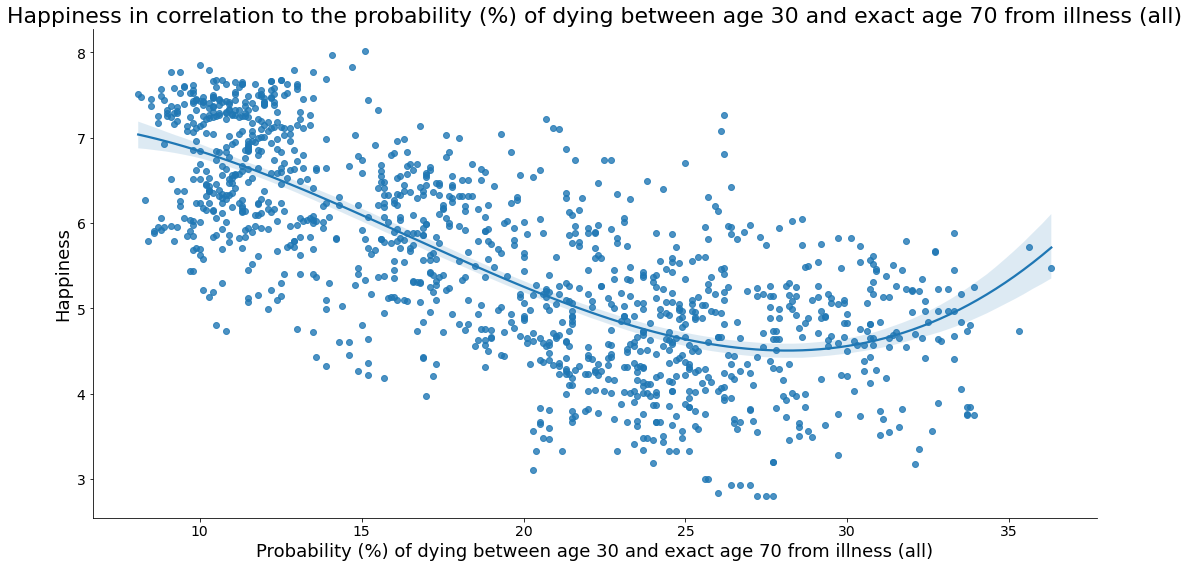

In [28]:
# Dying from illness and correlation to happiness 
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_death_causes_combined, x="Probability (%) of dying between age 30 and exact age 70 from illness (all)", y="happiness_score", order=3)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('Probability (%) of dying between age 30 and exact age 70 from illness (all)')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the probability (%) of dying between age 30 and exact age 70 from illness (all)')
plt.show()

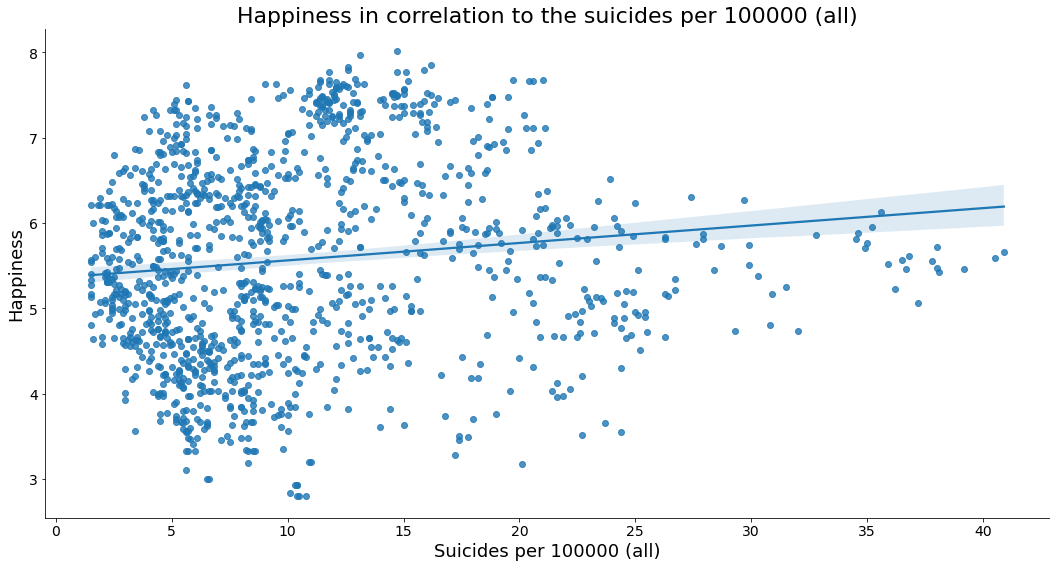

In [87]:
# Dying from suicide and correlation to happiness 
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_death_causes_combined, x="Suicides per 100000 (all)", y="happiness_score", order=1)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('Suicides per 100000 (all)')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the suicides per 100000 (all)')
plt.show()

### Internet users

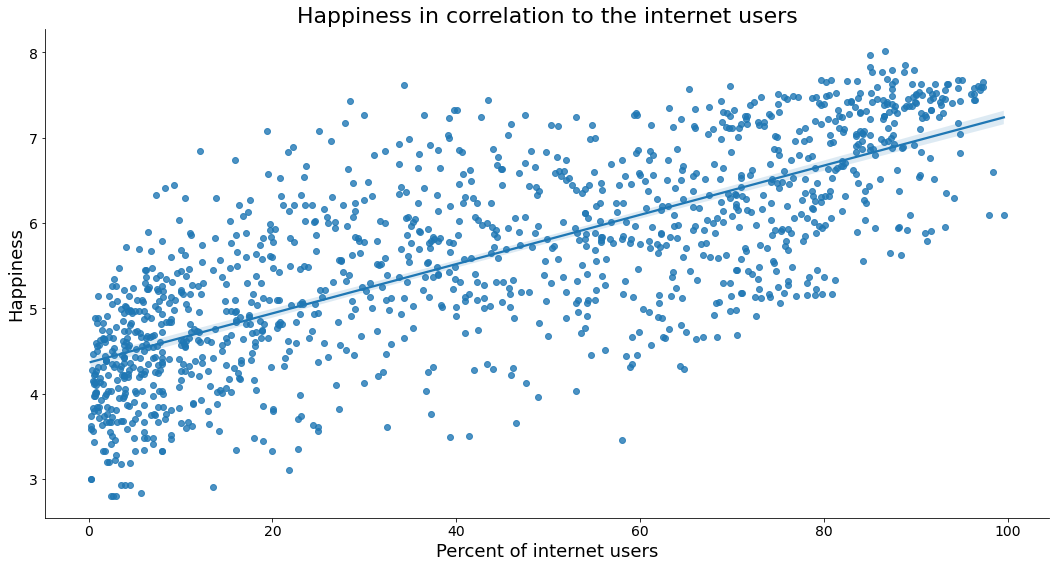

In [30]:
# Internet users
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_internet_users_combined, x="percent_internet_users", y="happiness_score", order=1)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('Percent of internet users')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the internet users')
plt.show()

### Population and country data

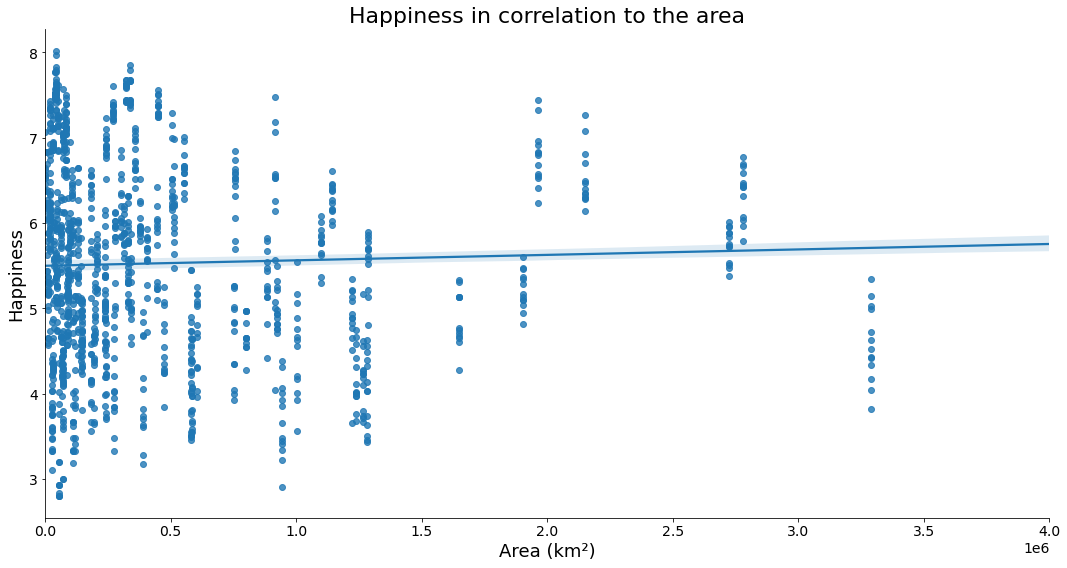

In [31]:
# Area
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_population_combined, x="Area (km²)", y="happiness_score", order=1)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, 4000000)

plt.xlabel('Area (km²)')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the area')
plt.show()

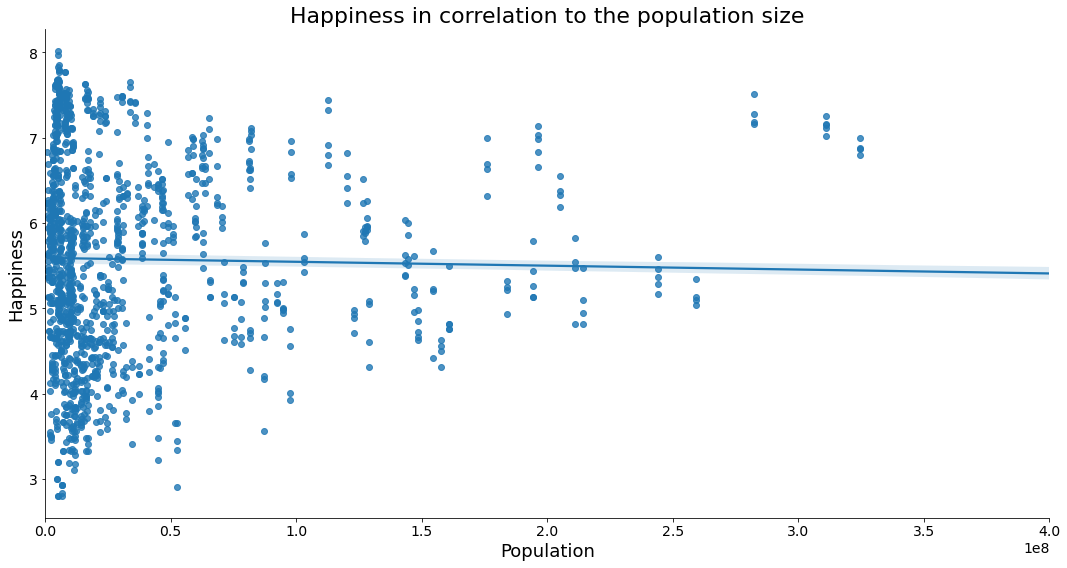

In [32]:
# Population
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_population_combined, x="population", y="happiness_score", order=1)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, 400000000)

plt.xlabel('Population')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the population size')
plt.show()

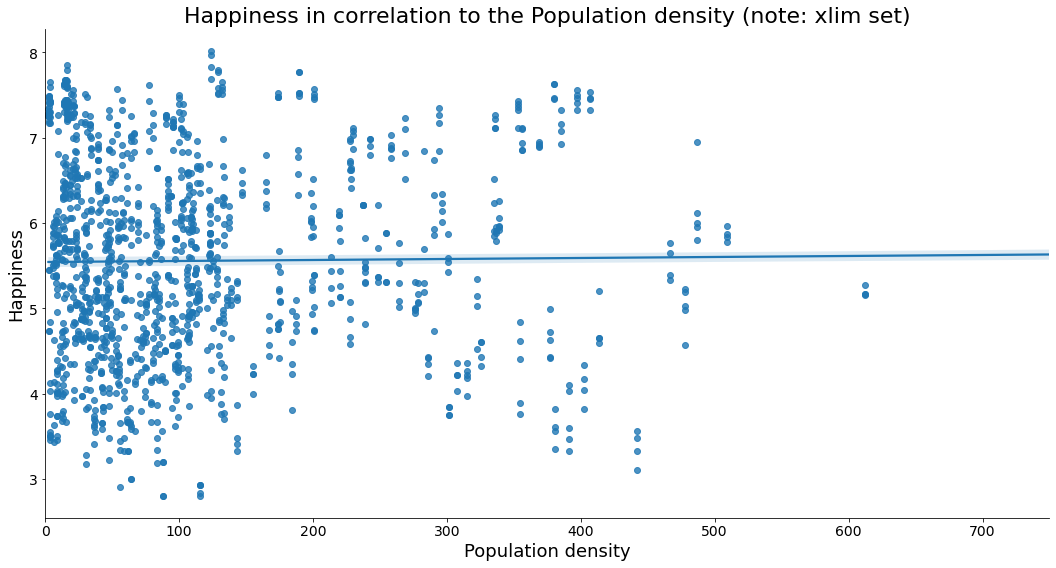

In [33]:
# Population density
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_population_combined, x="population density", y="happiness_score", order=1)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(0, 750)

plt.xlabel('Population density')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the Population density (note: xlim set)')
plt.show()

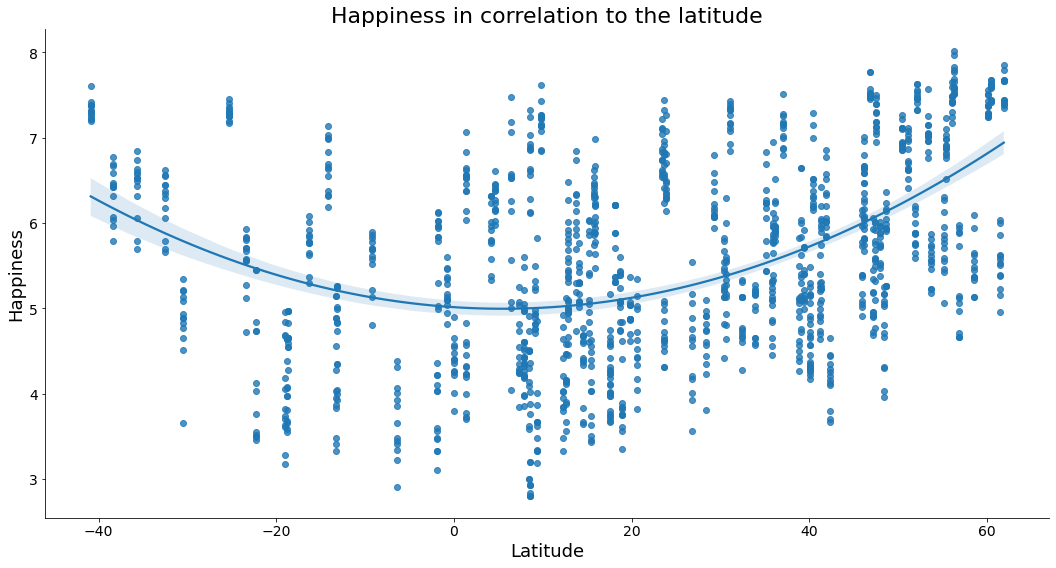

In [34]:
# Latitude
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_population_combined, x="latitude", y="happiness_score", order=2)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('Latitude')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the latitude')
plt.show()

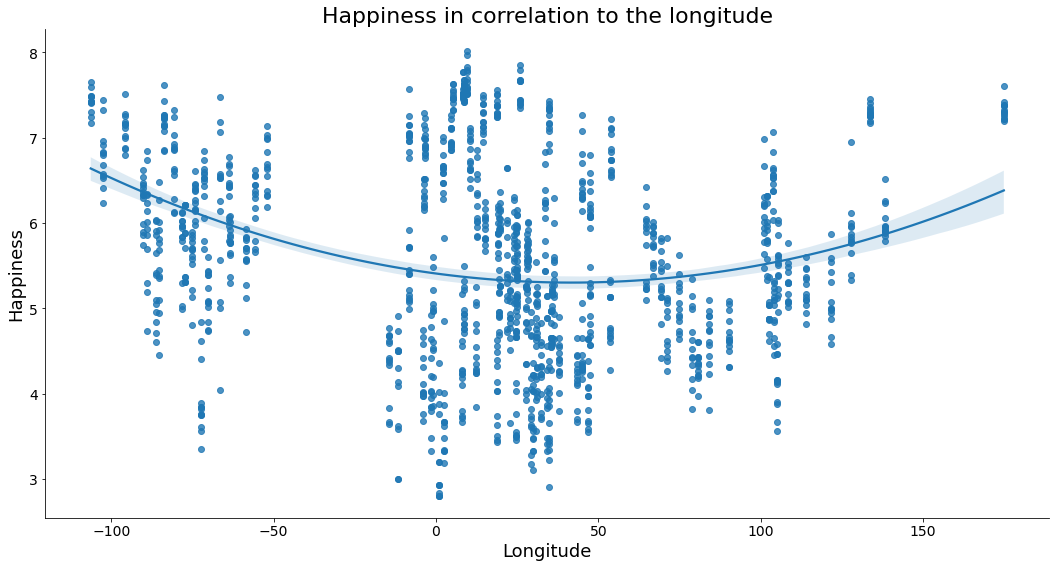

In [35]:
# Longitude
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_population_combined, x="longitude", y="happiness_score", order=2)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('Longitude')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the longitude')
plt.show()

### GDP data

Text(0.5, 1.0, 'Happiness x GDP per person')

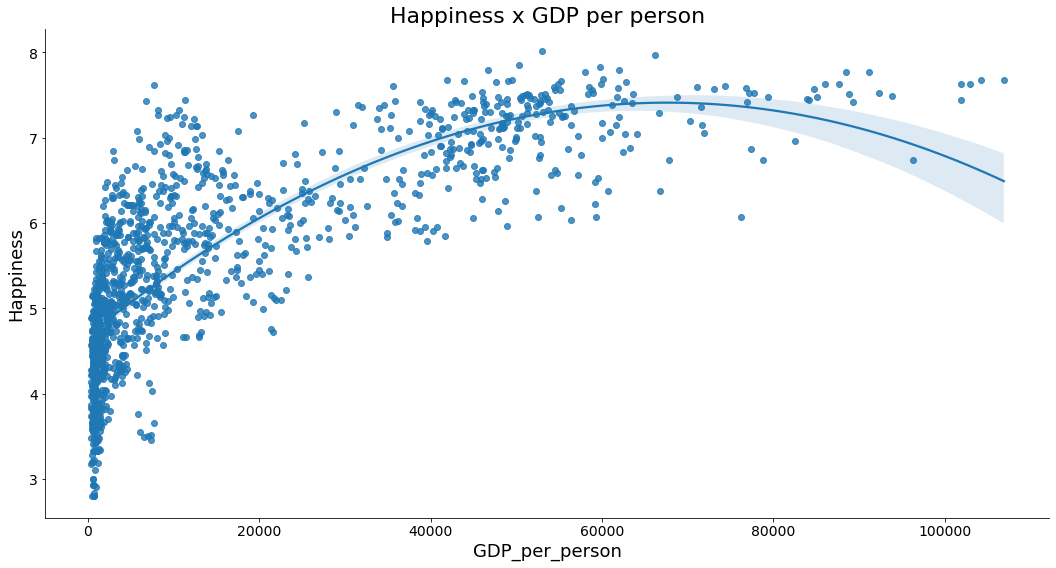

In [36]:
# GDP
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_gdp_combined, x="GDP_per_person", y="happiness_score", order=2)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_xlim(0, 50000000000)

plt.xlabel('GDP_per_person')
plt.ylabel('Happiness')

plt.title('Happiness x GDP per person')

In [37]:
df_gdp_combined

# Sort the dataframe by 'country' and 'year' columns in ascending order
df_gdp_combined.sort_values(by='GDP_per_person', ascending= False)

,country,year,gdp,happiness_score,social_support,birth_health,freedom,generosity,perception_corruption,government_confidence,GDP_per_person
839,Norway,2013,522761531915.00,7.68,0.95,70.60,0.95,0.14,0.37,0.66,106910.00
838,Norway,2012,509506317147.00,7.68,0.95,70.60,0.95,0.14,0.37,0.66,104199.00
834,Norway,2008,462250000000.00,7.63,0.94,69.80,0.95,0.01,0.50,0.54,102923.00
840,Norway,2014,498410050251.00,7.44,0.94,71.00,0.96,0.18,0.40,0.70,101930.00
837,Norway,2011,498283438454.00,7.63,0.94,69.80,0.95,0.01,0.50,0.54,101904.00
...,...,...,...,...,...,...,...,...,...,...,...
683,Malawi,2013,5518880769.00,4.04,0.56,52.78,0.75,0.05,0.86,0.64,375.00
1263,Zimbabwe,2008,4415702800.00,3.17,0.84,42.80,0.34,-0.07,0.96,0.18,373.00
754,Nepal,2006,9043715356.00,4.57,0.87,59.66,0.69,0.05,0.90,0.43,368.00
676,Malawi,2006,3998020177.00,3.83,0.55,45.36,0.77,0.17,0.68,0.69,356.00


Text(0, 0.5, 'score')

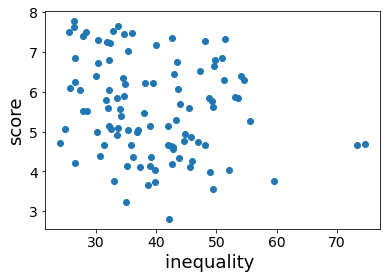

In [38]:
plt.figure()
plt.scatter(df_inequality_combined[df_inequality_combined.year == 2010]['gini_reported'], df_inequality_combined[df_inequality_combined.year == 2010]['happiness_score'])
plt.xlabel('inequality ')
plt.ylabel('score')

In [39]:
"""for df in new_dataframes:

  print("Original:")
  print(df.corr()['happiness_score'].sort_values())

  df_trans = df.copy()

  for col in df_trans.select_dtypes(include=['number']).columns:
    if col != 'happiness_score':
      df_trans[col + '_log'] = np.log(df_trans[col])
      df_trans[col + '_sq'] = df_trans[col]**2

  print("Transformed:")
  print(df_trans.corr()['happiness_score'].sort_values())

  print()"""

# von Wilma erklären lassen

'for df in new_dataframes:\n\n  print("Original:")\n  print(df.corr()[\'happiness_score\'].sort_values())\n\n  df_trans = df.copy()\n\n  for col in df_trans.select_dtypes(include=[\'number\']).columns:\n    if col != \'happiness_score\':\n      df_trans[col + \'_log\'] = np.log(df_trans[col])\n      df_trans[col + \'_sq\'] = df_trans[col]**2\n\n  print("Transformed:")\n  print(df_trans.corr()[\'happiness_score\'].sort_values())\n\n  print()'

### Inequality

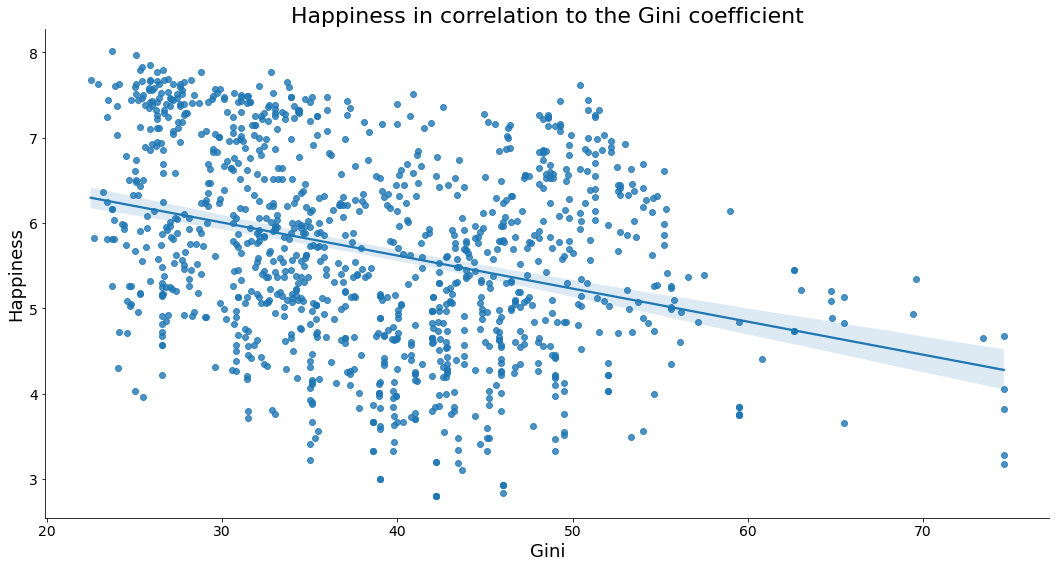

In [40]:
# Inequality
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_inequality_combined, x="gini_reported", y="happiness_score", order=1)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('Gini')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the Gini coefficient')
plt.show()

### Temperature change

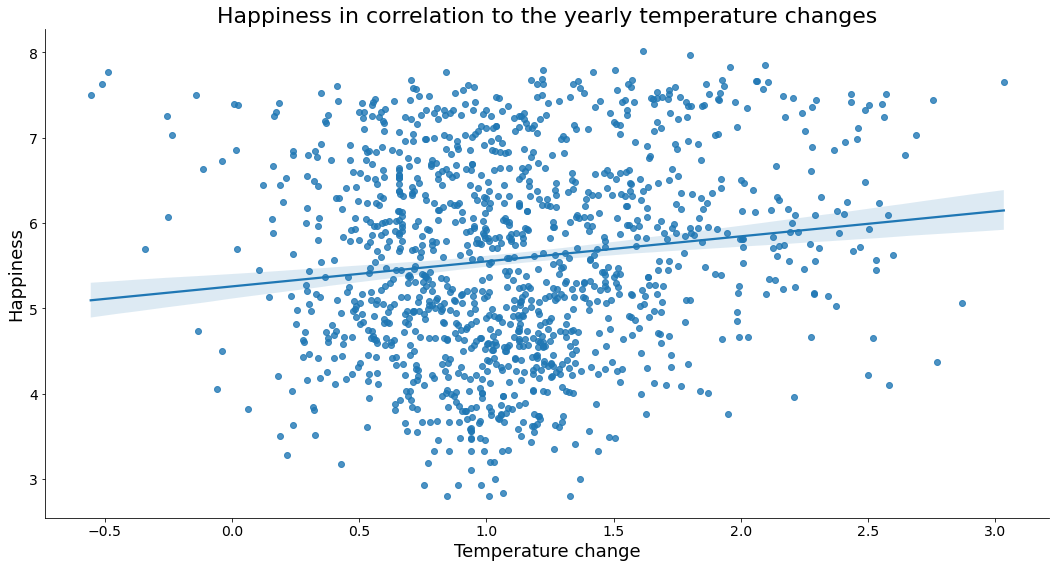

In [41]:
# Temperature developement
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_environment_combined, x="temperature_change", y="happiness_score", order=1)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('Temperature change')
plt.ylabel('Happiness')

plt.title('Happiness in correlation to the yearly temperature changes')
plt.show()

### some more scatterplots for df_happiness.columns

In [102]:
df_happiness.columns

Index(['country', 'year', 'regional_indicator', 'happiness_score', 'log_gdp',
       'social_support', 'birth_health', 'freedom', 'generosity',
       'perception_corruption', 'Positive Affect', 'Negative Affect',
       'government_confidence'],
      dtype='object')

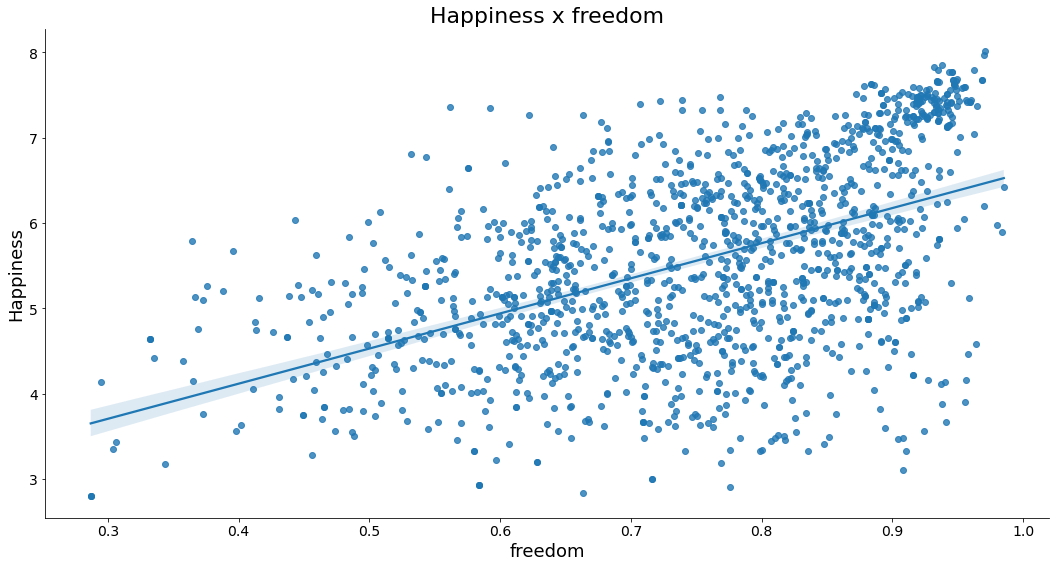

In [114]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_happiness, x="freedom", y="happiness_score", order=1)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('freedom')
plt.ylabel('Happiness')

plt.title('Happiness x freedom')
plt.show()

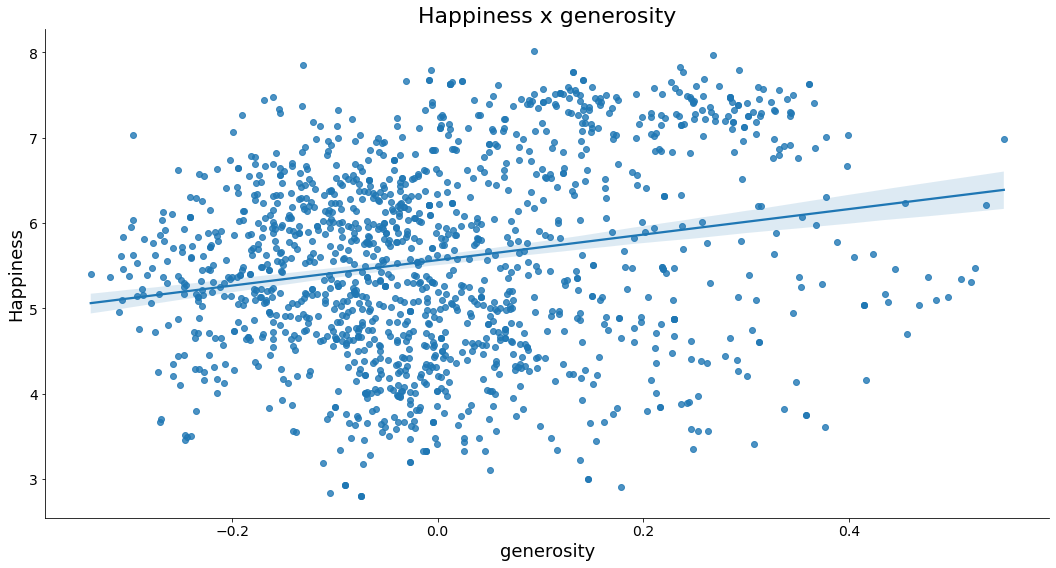

In [113]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_happiness, x="generosity", y="happiness_score", order=1)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('generosity')
plt.ylabel('Happiness')

plt.title('Happiness x generosity')
plt.show()

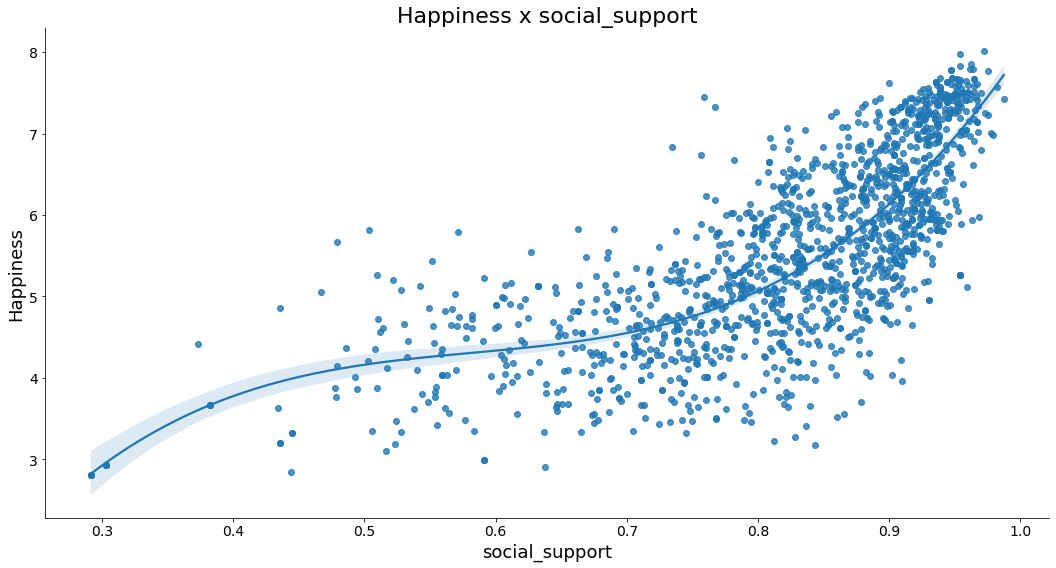

In [111]:

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_happiness, x="social_support", y="happiness_score", order=3)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('social_support')
plt.ylabel('Happiness')

plt.title('Happiness x social_support')
plt.show()

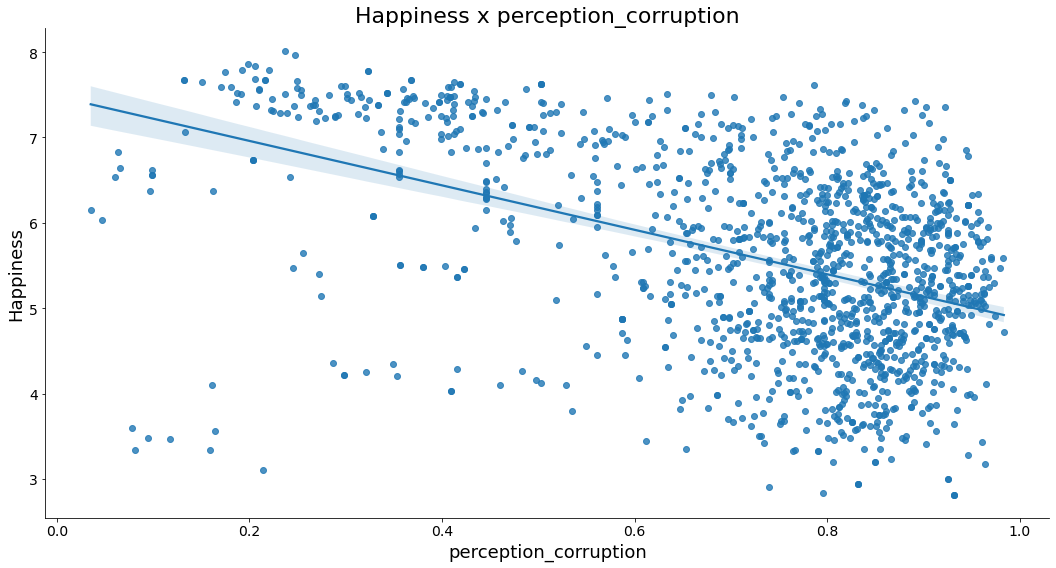

In [109]:

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_happiness, x="perception_corruption", y="happiness_score", order=1)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('perception_corruption')
plt.ylabel('Happiness')

plt.title('Happiness x perception_corruption')
plt.show()

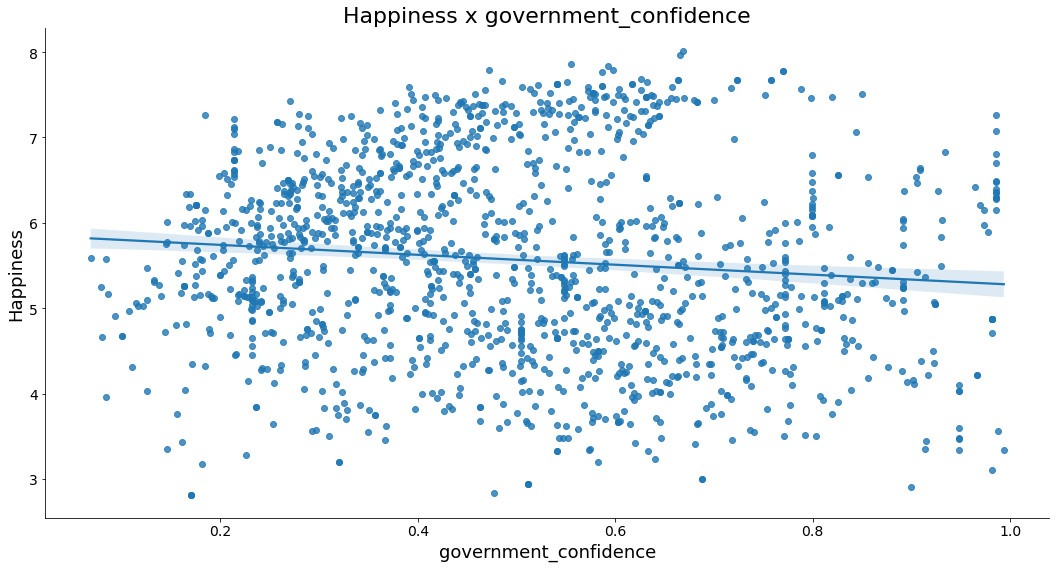

In [107]:

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 9))
ax= sns.regplot(data=df_happiness, x="government_confidence", y="happiness_score", order=1)

# Formatierung anpassen
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_ylim(0, 1)

plt.xlabel('government_confidence')
plt.ylabel('Happiness')

plt.title('Happiness x government_confidence')
plt.show()

## aggregate by gdp per capita

In [42]:
# Calculate quantiles
quantiles = all_dataframes_combined['GDP_per_person'].quantile([0.33, 0.66])

# Create labels
labels = ['low', 'medium', 'high']

# Cut gdp into bins and label
all_dataframes_combined['gdp_categorical'] = pd.cut(all_dataframes_combined['GDP_per_person'], 
                                                   bins=[0, quantiles[0.33], quantiles[0.66], max(all_dataframes_combined['gdp'])],
                                                   labels=labels)


### happiness score over time

/tmp/ipykernel_3788/4240658964.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


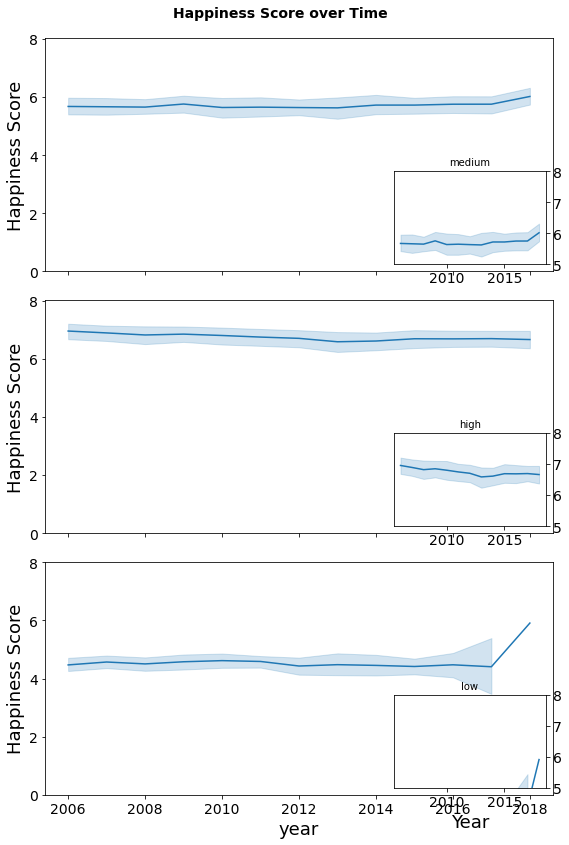

In [43]:
categories = all_dataframes_combined['gdp_categorical'].unique()
num_categories = len(categories)
fig, axs = plt.subplots(num_categories, 1, figsize=(8, 4*num_categories), sharex=True)

max_happiness_score = all_dataframes_combined['happiness_score'].max()

for i, category in enumerate(categories):
    df_filtered = all_dataframes_combined[all_dataframes_combined['gdp_categorical'] == category]
    df_filtered = df_filtered.dropna()

    # Main plot
    sns.lineplot(data=df_filtered, x='year', y='happiness_score', ax=axs[i])
    axs[i].set_ylabel('Happiness Score')

    # Inset plot with scaled y-axis
    ax_inset = inset_axes(axs[i], width="30%", height="40%", loc="lower right")
    sns.lineplot(data=df_filtered, x='year', y='happiness_score', ax=ax_inset)
    ax_inset.set_title(category, fontsize=10)
    ax_inset.set(xlabel=None, ylabel=None)  # remove labels
    ax_inset.yaxis.tick_right()  # move y-axis ticks to right side of plot
    ax_inset.set_ylim(5, 8)  # set the y-axis range

    axs[i].set_ylim(0, max_happiness_score)

plt.xlabel('Year')
fig.suptitle('Happiness Score over Time', fontsize=14, fontweight='bold')
plt.tight_layout()


plt.show()

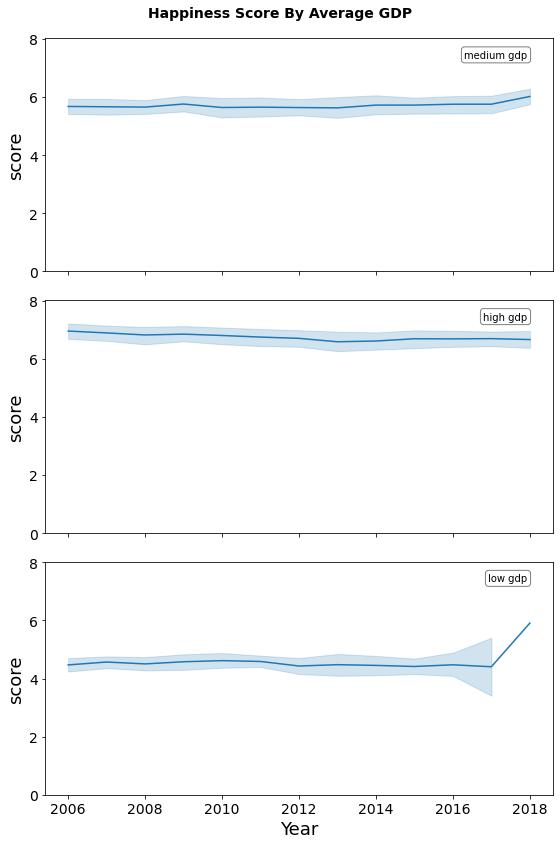

In [44]:
categories = all_dataframes_combined['gdp_categorical'].unique()
num_categories = len(categories)
fig, axs = plt.subplots(num_categories, 1, figsize=(8, 4*num_categories), sharex=True)

max_happiness_score = all_dataframes_combined['happiness_score'].max()

for i, category in enumerate(categories):
    df_filtered = all_dataframes_combined[all_dataframes_combined['gdp_categorical'] == category]
    df_filtered = df_filtered.dropna()
    sns.lineplot(data=df_filtered, x='year', y='happiness_score', ax=axs[i])

    axs[i].set_ylabel('score')
    axs[i].set_title('')

    axs[i].text(0.95, 0.95, f"{category} gdp", transform=axs[i].transAxes, ha='right', va='top', fontsize=10, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'))

    axs[i].set_ylim(0, max_happiness_score)

plt.xlabel('Year')
fig.suptitle('Happiness Score By Average GDP', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### plot happiness x predictors (GDP categories)

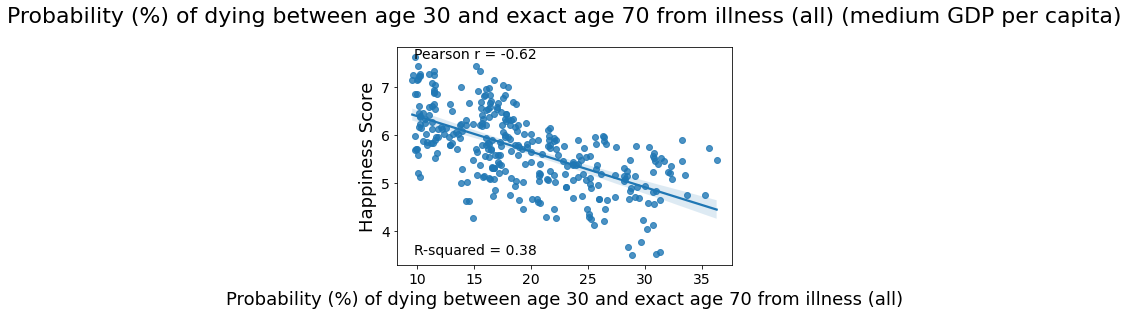

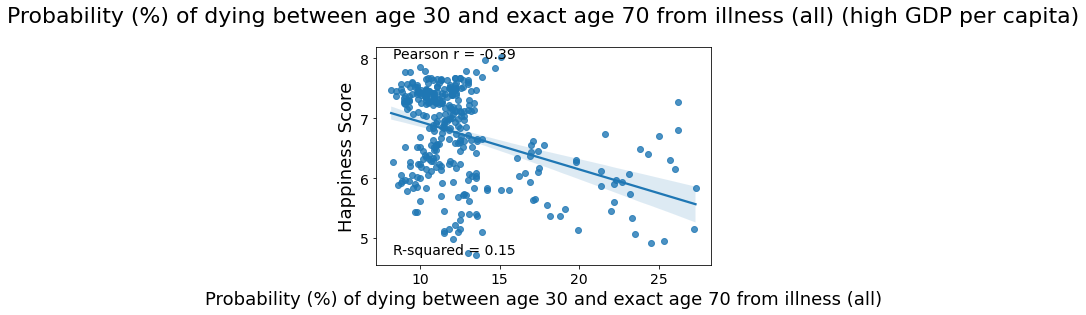

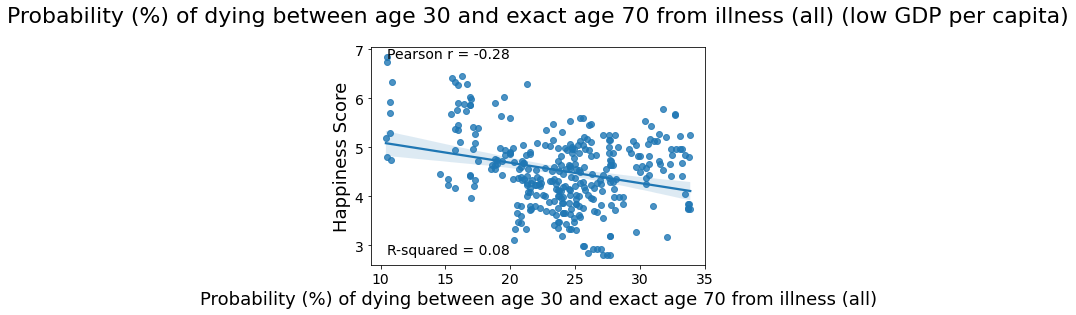

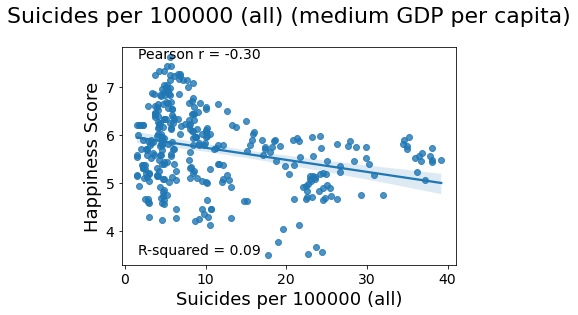

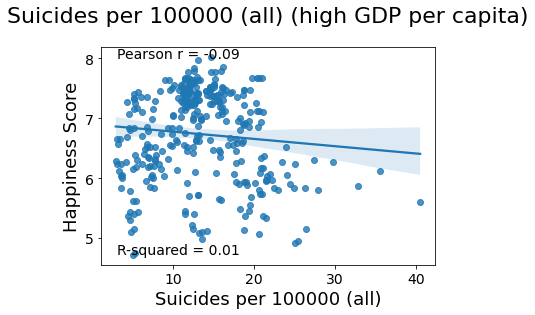

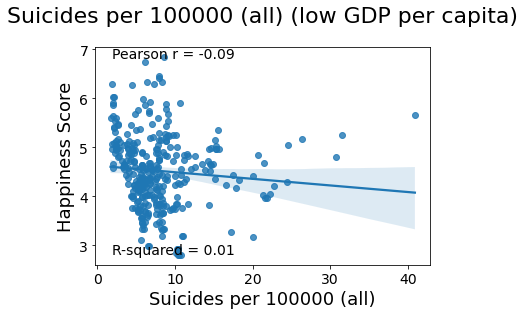

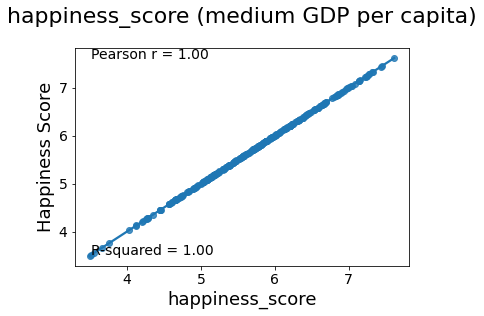

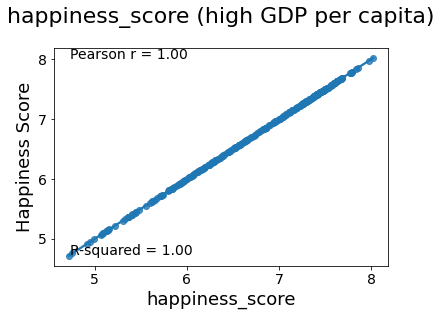

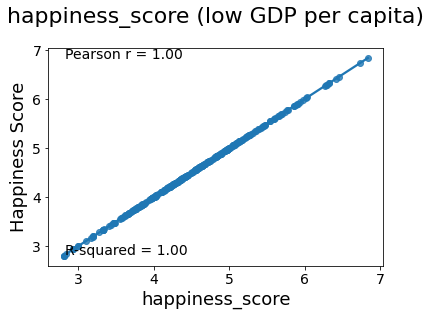

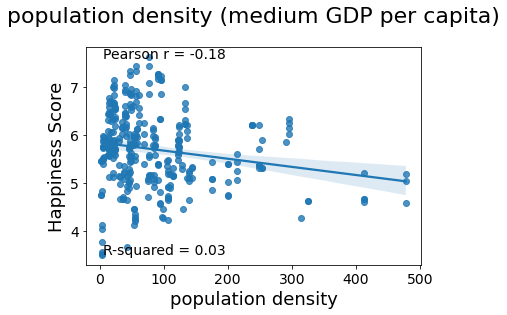

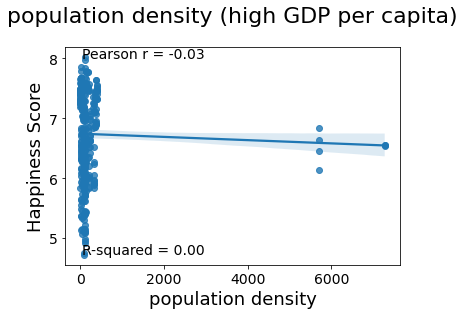

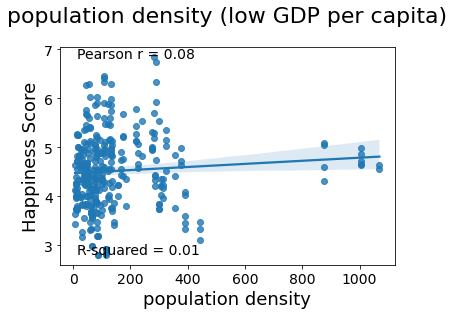

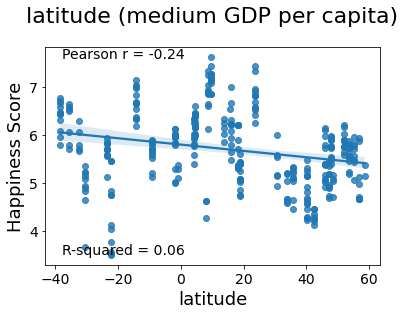

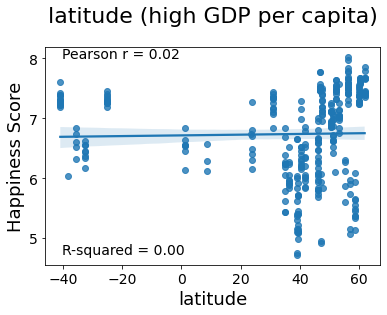

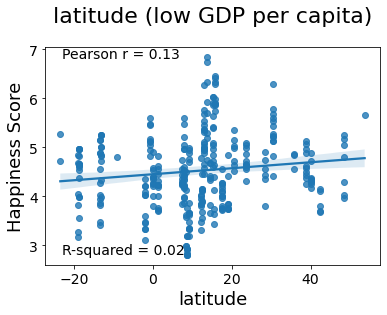

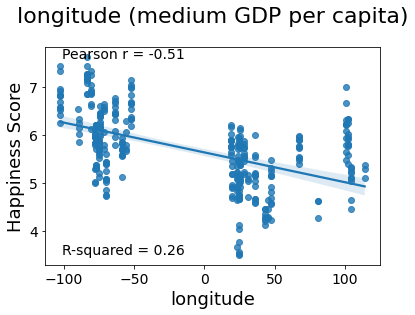

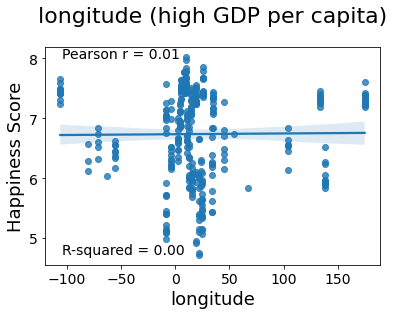

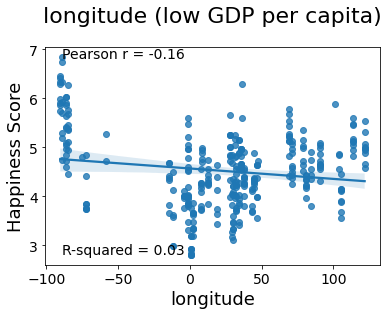

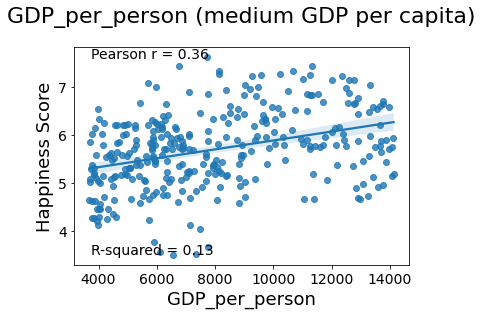

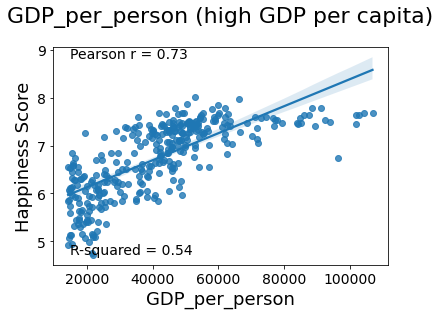

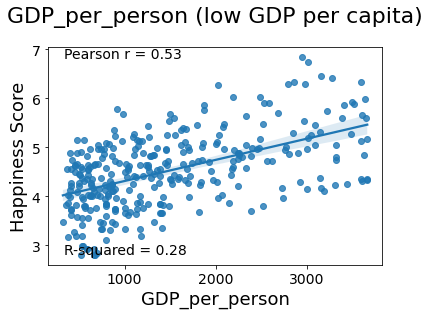

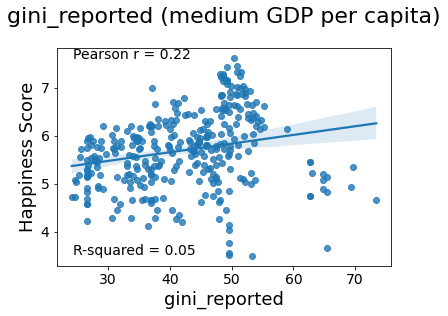

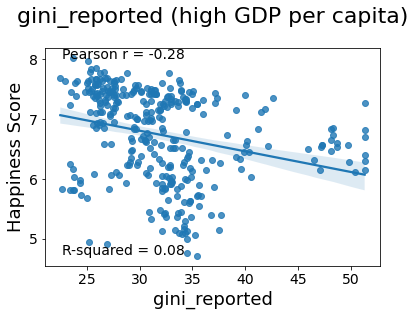

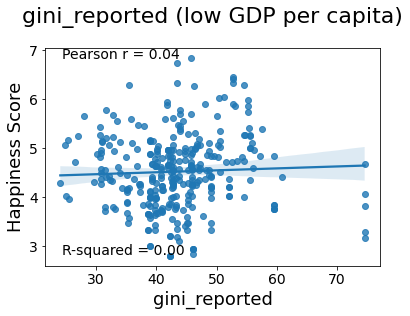

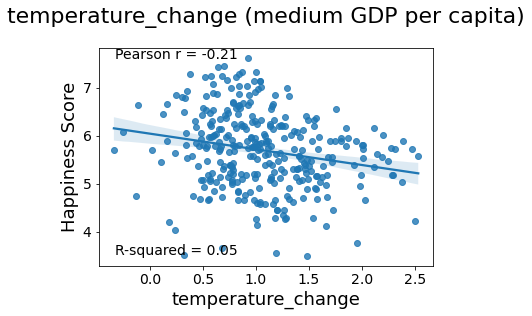

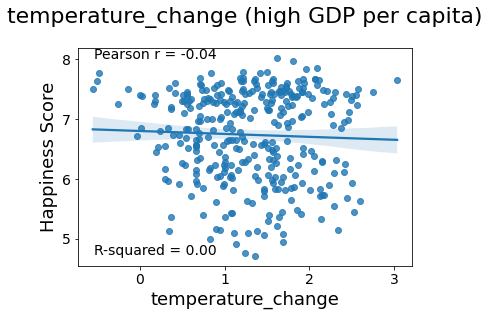

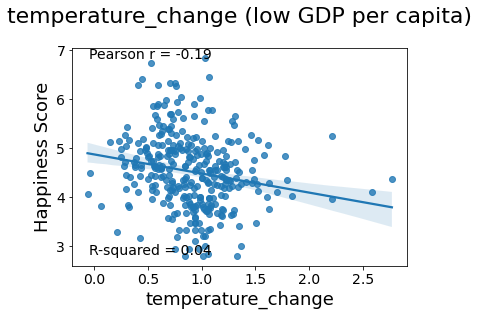

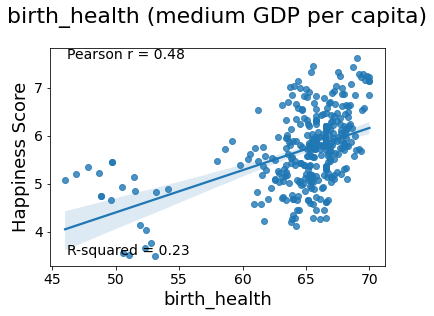

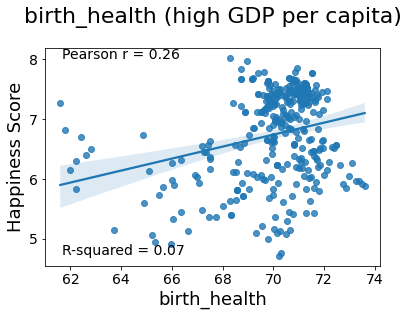

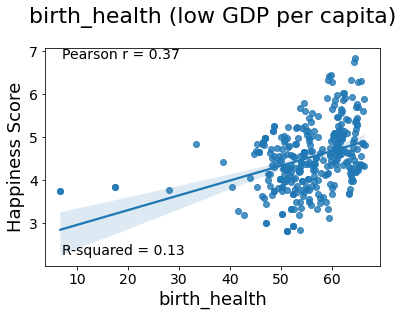

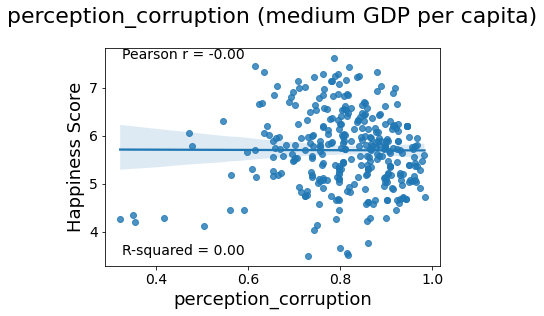

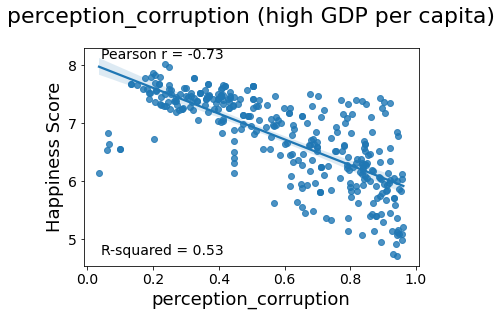

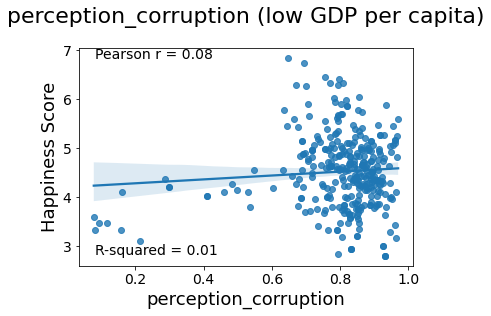

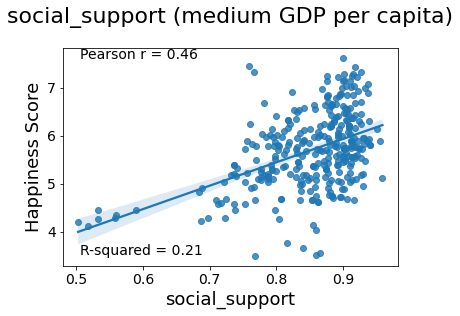

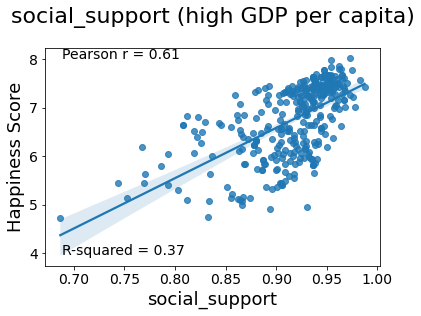

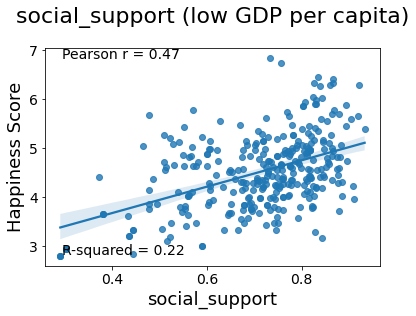

In [45]:
for predictor in ['Probability (%) of dying between age 30 and exact age 70 from illness (all)', 'Suicides per 100000 (all)','happiness_score', 'population density', 'latitude', 'longitude', 'GDP_per_person',
       'gini_reported', 'temperature_change', 'birth_health', 'perception_corruption', 'social_support' ]:

    for category in all_dataframes_combined['gdp_categorical'].unique():

      df_filtered = all_dataframes_combined[all_dataframes_combined['gdp_categorical'] == category]
      df_filtered = df_filtered.dropna()

      regr = LinearRegression()
      regr.fit(df_filtered[[predictor]], df_filtered['happiness_score'])

      r_squared = regr.score(df_filtered[[predictor]], df_filtered['happiness_score'])

      # Calculate correlation
      corr = np.corrcoef(df_filtered[predictor], df_filtered['happiness_score'])[0,1]

      ax = sns.regplot(data=df_filtered, x=predictor, y="happiness_score")


            # Correlation text in top left 
      ax.text(0.05, 0.95, f'Pearson r = {corr:.2f}', 
                transform=ax.transAxes, fontsize=14)

        # R-squared text in bottom left  
      ax.text(0.05, 0.05, f'R-squared = {r_squared:.2f}', 
                transform=ax.transAxes, fontsize=14)

        # Title in center top
      ax.set_title(f"{predictor} ({category} GDP per capita)", 
                     loc='center', pad=25)

      # Labels, title
     # ax.set_title(f"Temperature Change vs Happiness ({category} GDP per capita)") 
      ax.set_xlabel(predictor)
      ax.set_ylabel("Happiness Score")

      plt.show()


**für perception_corruptuion und gini schein aggregieren nach gdp tatsächlcih einen unterschied zu machen**

## group by latidude?

In [46]:
df_latitude_longitude

,latitude,longitude,country
1,23.42,53.85,United Arab Emirates
2,33.94,67.71,Afghanistan
5,41.15,20.17,Albania
6,40.07,45.04,Armenia
8,-11.20,17.87,Angola
...,...,...,...
239,42.60,20.90,Kosovo
240,15.55,48.52,Yemen
242,-30.56,22.94,South Africa
243,-13.13,27.85,Zambia


## Aggregate all datasets and determine main influence with ML

In [47]:
numerical_df = all_dataframes_combined.select_dtypes(include=[np.number])
numerical_df.dropna(inplace=True)
numerical_df

,year,Probability (%) of dying between age 30 and exact age 70 from illness (all),Suicides per 100000 (all),happiness_score,social_support,birth_health,freedom,generosity,perception_corruption,government_confidence,percent_internet_users,Area (km²),population,population density,latitude,longitude,gdp,GDP_per_person,gini_reported,temperature_change
0,2006,18.30,8.60,6.31,0.94,65.82,0.73,-0.16,0.85,0.52,20.93,2780400.00,37070774.00,13.33,-38.42,-63.62,232557260817.00,6273.00,46.51,0.58
1,2007,18.80,8.30,6.07,0.86,65.94,0.65,-0.14,0.88,0.41,25.95,2780400.00,37070774.00,13.33,-38.42,-63.62,287530508431.00,7756.00,46.14,-0.25
2,2008,18.00,8.70,5.96,0.89,66.06,0.68,-0.13,0.86,0.29,28.11,2780400.00,37070774.00,13.33,-38.42,-63.62,361558037110.00,9753.00,44.40,0.57
3,2009,17.80,8.40,6.42,0.92,66.18,0.64,-0.13,0.88,0.27,34.00,2780400.00,37070774.00,13.33,-38.42,-63.62,332976484578.00,8982.00,43.81,0.71
4,2010,17.80,8.60,6.44,0.93,66.30,0.73,-0.13,0.85,0.35,45.00,2780400.00,41100123.00,14.78,-38.42,-63.62,423627422092.00,10307.00,42.91,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,2007,29.70,17.20,3.28,0.83,41.60,0.46,-0.07,0.95,0.23,3.00,390757.00,11834676.00,30.29,-19.02,29.15,5291950100.00,447.00,74.60,0.22
981,2008,32.10,20.10,3.17,0.84,42.80,0.34,-0.07,0.96,0.18,3.50,390757.00,11834676.00,30.29,-19.02,29.15,4415702800.00,373.00,74.60,0.43
982,2009,33.50,22.20,4.06,0.81,44.00,0.41,-0.06,0.93,0.29,4.00,390757.00,11834676.00,30.29,-19.02,29.15,9665793300.00,817.00,74.60,-0.06
983,2010,33.30,21.50,4.68,0.86,45.20,0.66,-0.08,0.83,0.47,6.40,390757.00,12839771.00,32.86,-19.02,29.15,12041655200.00,938.00,74.60,1.03


Mean happiness: 5.66
MSE: 0.12
RMSE: 0.34
Relative RMSE: 6.03 %
R²-Score 0.919


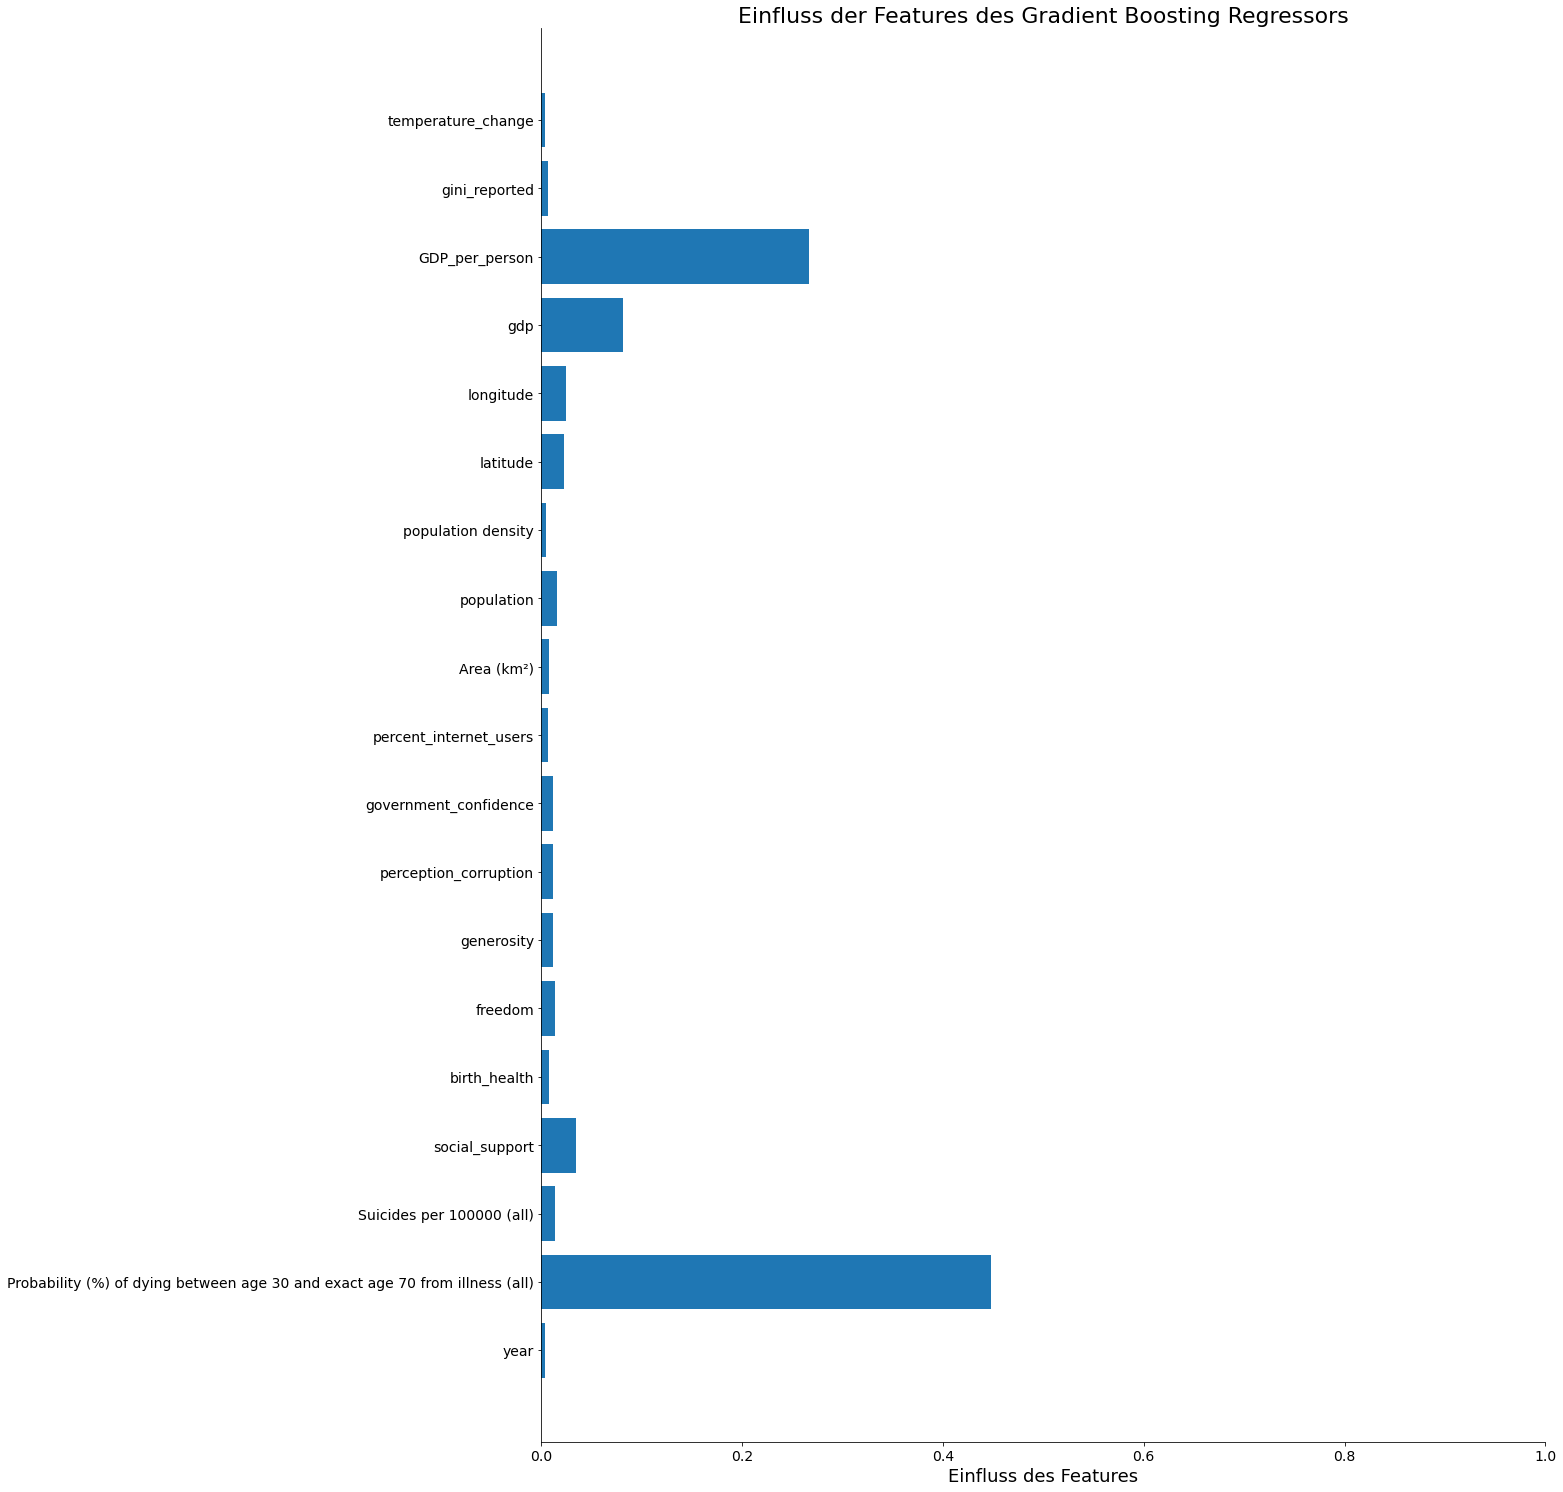

In [48]:
# ML
x = numerical_df.drop('happiness_score', axis=1)
y = numerical_df[['happiness_score']]
y = np.ravel(y)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20, random_state=42)

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor

ML_GradientBoostingRegressor = GradientBoostingRegressor(max_depth=5, n_estimators=150, random_state=42)
ML_GradientBoostingRegressor.fit(x_train, y_train)

y_pred=ML_GradientBoostingRegressor.predict(x_test)

print("Mean happiness:", round(numerical_df['happiness_score'].mean(), 2))
print("MSE:",round(mean_squared_error(y_test, y_pred),2))
print("RMSE:",round(np.sqrt(mean_squared_error(y_test, y_pred)),2))
print("Relative RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)) / np.mean(numerical_df['happiness_score']) * 100, 2), "%")
print("R²-Score",round(ML_GradientBoostingRegressor.score(x_test,y_test),3))

feature_names = x.columns.tolist()

plt.figure(figsize=(18, 26))
plt.barh(range(len(ML_GradientBoostingRegressor.feature_importances_)), ML_GradientBoostingRegressor.feature_importances_)
plt.yticks(range(len(ML_GradientBoostingRegressor.feature_importances_)), feature_names) 
plt.xlim(0,1)
plt.xlabel("Einfluss des Features")

plt.gca().spines['right'].set_visible(False)  # Entfernen des rechten Rahmens
plt.gca().spines['top'].set_visible(False)  # Entfernen des oberen Rahmens

plt.title('Einfluss der Features des Gradient Boosting Regressors')
plt.show()

In [49]:
# Adaptable model

x = numerical_df.drop('happiness_score', axis=1)
x.columns = x.columns.str.replace(' ', '_')
x.rename(columns={'Probability_(%)_of_dying_between_age_30_and_exact_age_70_from_illness_(all)': 'Probability_of_dying_between_30_and_70_from_illness_all'}, inplace=True)
x = x[['Probability_of_dying_between_30_and_70_from_illness_all','percent_internet_users','GDP_per_person']]

y = numerical_df[['happiness_score']]
y = np.ravel(y)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20, random_state=42)

ML_GradientBoostingRegressor = GradientBoostingRegressor(max_depth=5, n_estimators=150, random_state=42)
ML_GradientBoostingRegressor.fit(x_train, y_train)

y_pred=ML_GradientBoostingRegressor.predict(x_test)

import gradio as gr

def greet(Probability_of_dying_between_30_and_70_from_illness_all, percent_internet_users, GDP_per_person):
    data = pd.DataFrame.from_dict({'Probability_of_dying_between_30_and_70_from_illness_all': [Probability_of_dying_between_30_and_70_from_illness_all], 'percent_internet_users': [percent_internet_users], 'GDP_per_person': [GDP_per_person],})
    y_pred = ML_GradientBoostingRegressor.predict(data)
    print(y_pred)
    return y_pred[0]

output = gr.outputs.Textbox(label='Vorhergesagte der Happiness')

iface = gr.Interface(
    fn=greet,
    inputs=[gr.Slider(0, 100), gr.Slider(0, 100), gr.Slider(0, 100000)],
    outputs=output,
    title='Glück-Vorhersagemodell',
    description='Ein Modell zur Vorhersage des Glücks eines Landes basierend auf verschiedenen Parametern.',
    theme='default'
)

iface.launch(share=True)

/tmp/ipykernel_3788/1321019902.py:26: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  output = gr.outputs.Textbox(label='Vorhergesagte der Happiness')


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://b953106c16a985eaf5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## lineares model mit predictors die scheinbar linear relationship zu happiness_score haben 

In [ ]:
# Select relevant columns
X = all_dataframes_combined[['Probability (%) of dying between age 30 and exact age 70 from illness (all)', 
                             'Suicides per 100000 (all)',
                             'percent_internet_users',
                             'population density',
                             'GDP_per_person',
                             'gini_reported',
                             'temperature_change', 'latitude', 'longitude']]

y = all_dataframes_combined['happiness_score']




scaler = StandardScaler()

X_scaled = X.copy()
for col in X_scaled.columns:
    X_scaled[col] = scaler.fit_transform(X_scaled[col].values.reshape(-1,1))
    
X_complete = X_scaled.dropna()
y_complete = y.loc[X_complete.index]


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_complete, y_complete, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Check p-values of the coefficients
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()

print(est2.summary())
p_values = est2.pvalues

# Set the significance level
significance_level = 0.05

# Extract the names of significant predictors
significant_predictors = [predictor for predictor, p_value in p_values.items() if p_value < significance_level]

# Print the significant predictors
print("Significant predictors:")
for predictor in significant_predictors:
    print(predictor)
    
    

In [ ]:
coefficients = model.coef_
predictor_names = X_train.columns

# Create a dataframe to store the coefficients and predictor names
coef_df = pd.DataFrame({'Predictor': predictor_names, 'Coefficient': coefficients})

# Sort the dataframe by coefficient values
sorted_coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Define colors based on coefficient values
colors = ['red' if c > 0 else 'blue' for c in sorted_coef_df['Coefficient']]

# Create the coefficient plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Predictor', data=sorted_coef_df, palette=colors)
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor')
plt.title('Coefficient Plot')
plt.tight_layout()
plt.show()

## trained a polynomial model (schwer interpretierbar, kann man vermutlich nicht wirklich visualisieren)

In [66]:
selected_numerical_columns = all_dataframes_combined[['Probability (%) of dying between age 30 and exact age 70 from illness (all)', 'Suicides per 100000 (all)','happiness_score', 'population density', 'latitude', 'longitude', 'GDP_per_person',
       'gini_reported', 'temperature_change', 'birth_health', 'perception_corruption', 'social_support' ]]

In [94]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial orders for each predictor
poly_orders = {
    "Probability (%) of dying between age 30 and exact age 70 from illness (all)": 3,
    "Suicides per 100000 (all)": 1,
    "GDP_per_person": 2,
    "gini_reported": 1
}

# Default polynomial order
default_order = 1

# Select relevant columns
X = all_dataframes_combined[['Probability (%) of dying between age 30 and exact age 70 from illness (all)', 'Suicides per 100000 (all)', 'population density', 'latitude', 
                             'longitude', 'GDP_per_person', 'gini_reported', 'temperature_change', 'birth_health', 'perception_corruption', 'social_support']]

y = all_dataframes_combined['happiness_score']

scaler = StandardScaler()

X_scaled = X.copy()
for col in X_scaled.columns:
    X_scaled[col] = scaler.fit_transform(X_scaled[col].values.reshape(-1,1))

X_complete = X_scaled.dropna()
y_complete = y.loc[X_complete.index]

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_complete, y_complete, test_size=0.2, random_state=42)

# Create polynomial features for each predictor and concatenate them
X_train_poly = pd.DataFrame()
X_test_poly = pd.DataFrame()

for predictor in X_train.columns:
    order = poly_orders.get(predictor, default_order)
    poly = PolynomialFeatures(order, include_bias=False)
    X_train_poly_transformed = poly.fit_transform(X_train[[predictor]])
    X_test_poly_transformed = poly.transform(X_test[[predictor]])
    
    # Convert numpy array to DataFrame and concatenate
    X_train_poly_transformed = pd.DataFrame(X_train_poly_transformed, columns=[f"{predictor}_{i}" for i in range(order)], index=X_train.index)
    X_test_poly_transformed = pd.DataFrame(X_test_poly_transformed, columns=[f"{predictor}_{i}" for i in range(order)], index=X_test.index)
    
    X_train_poly = pd.concat([X_train_poly, X_train_poly_transformed], axis=1)
    X_test_poly = pd.concat([X_test_poly, X_test_poly_transformed], axis=1)

# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Check p-values of the coefficients
X2 = sm.add_constant(X_train_poly)
est = sm.OLS(y_train, X2)
est2 = est.fit()

print(est2.summary())
p_values = est2.pvalues

# Set the significance level
significance_level = 0.05

# Extract the names of significant predictors
significant_predictors = [predictor for predictor, p_value in p_values.items() if p_value < significance_level]

# Print the significant predictors
print("Significant predictors:")
for predictor in significant_predictors:
    print(predictor)

R-squared: 0.8220491871936677
                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     233.1
Date:                Sat, 02 Sep 2023   Prob (F-statistic):          5.31e-266
Time:                        12:31:23   Log-Likelihood:                -600.30
No. Observations:                 788   AIC:                             1231.
Df Residuals:                     773   BIC:                             1301.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

### plotted coefficients (TODO: plot residuals?)

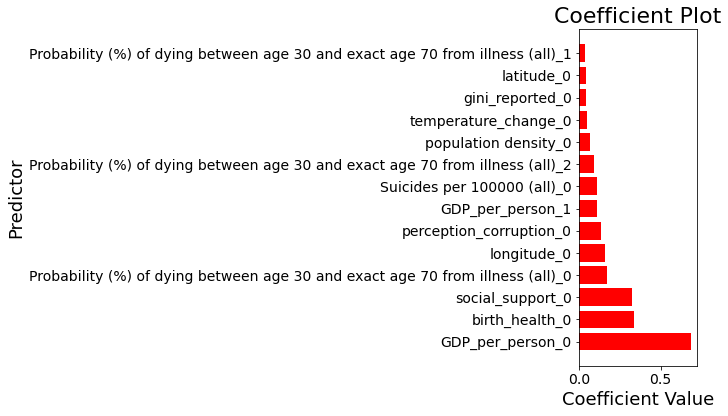

In [99]:

coefficients = np.abs(model.coef_)

poly_feature_names = X_train_poly.columns

# Create a DataFrame with the feature names and coefficients
coef_df = pd.DataFrame({'Predictor': poly_feature_names, 'Coefficient': coefficients})

sorted_coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

colors = ['red' if c > 0 else 'blue' for c in sorted_coef_df['Coefficient']]


plt.figure(figsize=(10, 6))
plt.barh(sorted_coef_df['Predictor'], sorted_coef_df['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor')
plt.title('Coefficient Plot')
plt.tight_layout()
plt.show()

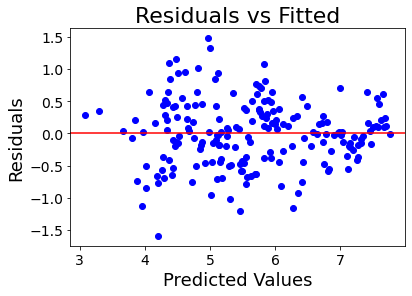

In [98]:

plt.scatter(y_pred, y_pred - y_test, c='blue') 
plt.axhline(y=0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

## differerence in predictors over years for averaged top happiest countriest and bottom least happiest countries

In [ ]:

predictors = ['happiness_score','Probability (%) of dying between age 30 and exact age 70 from illness (all)',
              'Suicides per 100000 (all)',
              'percent_internet_users',
              'population density',
              'GDP_per_person',
              'gini_reported',
              'temperature_change']


In [ ]:
number_countries_to_average = 3

country_happiness = all_dataframes_combined.groupby('country')['happiness_score'].mean()

sorted_countries = country_happiness.sort_values()

least_happy_countries = sorted_countries.head(number_countries_to_average).index

happy_countries = sorted_countries.tail(number_countries_to_average).index


In [ ]:




n = len(predictors)  
ncols = 2  
nrows = n // ncols if n % ncols == 0 else n // ncols + 1 



fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 5))

plotted_predictors = set()

for df in new_dataframes:
    for idx, predictor in enumerate(predictors):
        if predictor in df.columns and predictor not in plotted_predictors:
            years = range(int(df.year.min()), int(df.year.max()) + 1)

            happy_means = []
            least_happy_means = []

            for year in years:
                year_df = df[df['year'] == year]

                happy_mean = year_df[year_df['country'].isin(happy_countries)][predictor].mean()
                if not pd.isnull(happy_mean):
                    happy_means.append(happy_mean)

                least_happy_mean = year_df[year_df['country'].isin(least_happy_countries)][predictor].mean()
                if not pd.isnull(least_happy_mean):
                    least_happy_means.append(least_happy_mean)

            if len(happy_means) > 0 and len(least_happy_means) > 0:
                if len(happy_means) != len(least_happy_means):
                    min_len = min(len(happy_means), len(least_happy_means))
                    happy_means = happy_means[:min_len]
                    least_happy_means = least_happy_means[:min_len]

                happy_means = np.array(happy_means)
                least_happy_means = np.array(least_happy_means)

                difference = happy_means - least_happy_means

                ax = axs[idx // ncols, idx % ncols]  
                years = list(range(int(df.year.min()), int(df.year.max()) + 1))

                ax.plot(years[:len(difference)], difference, label='Difference')

                n_samples = len(happy_means)
                annotation = f'n = {n_samples}'
                ax.annotate(annotation, xy=(0.05, 0.05), xycoords='axes fraction', fontsize=10)

                ax.set_title(predictor, fontsize=10,)
                ax.legend()
                ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x)}"))
                plotted_predictors.add(predictor)

# Remove empty subplots if there are any
if len(new_dataframes) < nrows * ncols:
    for i in range(len(new_dataframes), nrows * ncols):
        fig.delaxes(axs[i // ncols, i % ncols])
fig.suptitle(f'Difference in Factors between Top {number_countries_to_average} Happiest Countries and Bottom {number_countries_to_average} Least Happy Countries', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


Difference plotten ist vermutlich verwirrend, vielleicht besser means separat?

In [ ]:

n = len(predictors)  
ncols = 2  
nrows = n // ncols if n % ncols == 0 else n // ncols + 1 

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 5))

plotted_predictors = set()

for df in new_dataframes:
    for idx, predictor in enumerate(predictors):
        if predictor in df.columns and predictor not in plotted_predictors:
            years = range(int(df.year.min()), int(df.year.max()) + 1)

            happy_means = []
            least_happy_means = []

            for year in years:
                year_df = df[df['year'] == year]

                happy_mean = year_df[year_df['country'].isin(happy_countries)][predictor].mean()
                if not pd.isnull(happy_mean):
                    happy_means.append(happy_mean)

                least_happy_mean = year_df[year_df['country'].isin(least_happy_countries)][predictor].mean()
                if not pd.isnull(least_happy_mean):
                    least_happy_means.append(least_happy_mean)

            if len(happy_means) > 0 and len(least_happy_means) > 0:
                if len(happy_means) != len(least_happy_means):
                    min_len = min(len(happy_means), len(least_happy_means))
                    happy_means = happy_means[:min_len]
                    least_happy_means = least_happy_means[:min_len]

                happy_means = np.array(happy_means)
                least_happy_means = np.array(least_happy_means)

                ax = axs[idx // ncols, idx % ncols]  
                years = list(range(int(df.year.min()), int(df.year.max()) + 1))

                # Plotting happy_means and least_happy_means
                ax.plot(years[:len(happy_means)], happy_means, label='Happy Countries')
                ax.plot(years[:len(least_happy_means)], least_happy_means, label='Least Happy Countries')

                n_samples = len(happy_means)
                annotation = f'n = {n_samples}'
                ax.annotate(annotation, xy=(0.05, 0.05), xycoords='axes fraction', fontsize=10)

                ax.set_title(predictor, fontsize=10,)
                ax.legend()
                ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x)}"))
                plotted_predictors.add(predictor)

# Remove empty subplots if there are any
if len(new_dataframes) < nrows * ncols:
    for i in range(len(new_dataframes), nrows * ncols):
        fig.delaxes(axs[i // ncols, i % ncols])
fig.suptitle(f'Difference in Factors between Top {number_countries_to_average} Happiest Countries and Bottom {number_countries_to_average} Least Happy Countries', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

## correlations

### numerical: happiness x predictors

In [100]:

# low correlation
for df in new_dataframes:
    print(df.corr()['happiness_score'].sort_values())

Probability (%) of dying between age 30 and exact age 70 from illness (all)   -0.71
perception_corruption                                                         -0.48
government_confidence                                                         -0.06
year                                                                           0.03
Suicides per 100000 (all)                                                      0.12
generosity                                                                     0.23
freedom                                                                        0.53
social_support                                                                 0.72
birth_health                                                                   0.72
happiness_score                                                                1.00
Name: happiness_score, dtype: float64
perception_corruption    -0.48
government_confidence    -0.09
year                      0.03
generosity                0.2

/tmp/ipykernel_3788/1966775157.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr()['happiness_score'].sort_values())


### 2 dim coordinates + 1 color dim

In [ ]:
numerical_df.columns


In [ ]:
# Calculate correlation matrix
correlation_matrix = numerical_df[['Probability (%) of dying between age 30 and exact age 70 from illness (all)', 'Suicides per 100000 (all)','happiness_score', 'population density', 'latitude', 'longitude', 'GDP_per_person',
       'gini_reported', 'temperature_change' ]].corr()

# Mask the lower triangular portion of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Apply the mask to the correlation matrix
masked_correlation_matrix = correlation_matrix.mask(mask)

# Find the three highest correlations (excluding the diagonal)
top_correlations = masked_correlation_matrix.unstack().nlargest(3)

# Print the top correlations
print(top_correlations)

In [ ]:
plt.scatter(selected_numerical_columns['Probability (%) of dying between age 30 and exact age 70 from illness (all)'],
            selected_numerical_columns['Suicides per 100000 (all)'],
            c=selected_numerical_columns['latitude'])
plt.text(0.5, 0.95, "Probability (%) of dying between age 30 and exact age 70 from illness (all) x Suicides per 100000 (all) x Latitude", ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

plt.scatter(selected_numerical_columns['Probability (%) of dying between age 30 and exact age 70 from illness (all)'],
            selected_numerical_columns['Suicides per 100000 (all)'],
            c=selected_numerical_columns['GDP_per_person'])
plt.text(0.5, 0.95, "Probability (%) of dying between age 30 and exact age 70 from illness (all) x Suicides per 100000 (all) x GDP per person", ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

plt.scatter(selected_numerical_columns['gini_reported'],
            selected_numerical_columns['Suicides per 100000 (all)'],
            c=selected_numerical_columns['GDP_per_person'])
plt.text(0.5, 0.95, "Gini Reported x Suicides per 100000 (all) x GDP per person", ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

plt.scatter(selected_numerical_columns['latitude'],
            selected_numerical_columns['longitude'],
            c=selected_numerical_columns['GDP_per_person'])
plt.text(0.5, 0.95, "Latitude x Longitude x GDP per person", ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

plt.scatter(selected_numerical_columns['latitude'],
            selected_numerical_columns['longitude'],
            c=selected_numerical_columns['Probability (%) of dying between age 30 and exact age 70 from illness (all)'])
plt.text(0.5, 0.95, "Latitude x Longitude x Probability (%) of dying between age 30 and exact age 70 from illness (all)", ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

### 3 dim axis

In [ ]:

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(all_dataframes_combined['Probability (%) of dying between age 30 and exact age 70 from illness (all)'],
           all_dataframes_combined['Suicides per 100000 (all)'],
           all_dataframes_combined['latitude'])
ax.set_xlabel("% dying btw 30 and 70 from illness")
ax.set_ylabel("Suicides per 100000")
ax.set_zlabel("Latitude")
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(all_dataframes_combined['Probability (%) of dying between age 30 and exact age 70 from illness (all)'],
           all_dataframes_combined['Suicides per 100000 (all)'],
           all_dataframes_combined['GDP_per_person'])
ax.set_xlabel("% dying btw 30 and 70 from illness")
ax.set_ylabel("Suicides per 100000")
ax.set_zlabel("GDP per person")
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(all_dataframes_combined['gini_reported'],
           all_dataframes_combined['Suicides per 100000 (all)'],
           all_dataframes_combined['GDP_per_person'])
ax.set_xlabel("Gini Reported")
ax.set_ylabel("Suicides per 100000")
ax.set_zlabel("GDP per person")
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(all_dataframes_combined['latitude'],
           all_dataframes_combined['longitude'],
           all_dataframes_combined['GDP_per_person'])
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("GDP per person")
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(all_dataframes_combined['latitude'],
           all_dataframes_combined['longitude'],
           all_dataframes_combined['Probability (%) of dying between age 30 and exact age 70 from illness (all)'])
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_zlabel("% dying btw 30 and 70 from illness")
plt.tight_layout()
plt.show()

## PCA

In [ ]:

def PCA_sklearn(data, n_components=None):
    '''
    Function that performs PCA on the input data, using sklearn

    input: (samples, predictors)-shaped array of log transformed cell counts
    output:
        fraction_variance_explained: (predictors,)-shaped array with the fraction of variance explained by the individual PCs
        principal_components (eigenvectors): (samples, predictors)-shaped array containing the principal components as columns
        eigenvalues: (predictors,)-shaped array containing the eigenvalues corresponding to the principal components
        normalized_data: (samples, predictors)-shaped array containing the normalized data
        backtransformed_data: (samples, predictors)-shaped array containing the normalized back-transformed data
    '''
    if n_components is None:
        n_components = data.shape[1]
    
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data)

    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(normalized_data)

    fraction_variance_explained = pca.explained_variance_ratio_
    principal_components = pca.components_
    eigenvalues = pca.explained_variance_

    backtransformed_data = scaler.inverse_transform(pca.inverse_transform(pca_result))

    return fraction_variance_explained, principal_components, eigenvalues, normalized_data, backtransformed_data, pca_result


Notiz an mich: 
- eigenvektoren sehen nicht sehr orthogonal aus

- faktor_weil_sonst_kaum_sichtbar sollte eigentlich nicht nicht notwendig sein

- PCA assumes linear relationship -> haben wir hier eher nicht, daher t-SNE




Eigenvector 1 starts at [0, 0, 0] and ends at [ 7.40693612 -2.66475725 -8.58306246 -0.9032875  -5.57312429  0.07227028
 -8.77105645  6.44791771 -3.95881712 -8.22216976  5.73240916 -7.24217319]
Eigenvector 2 starts at [0, 0, 0] and ends at [ 5.19208392  5.67977502 -3.23934824 -1.33239441  5.77476555  5.00750222
 -0.12612339 -5.52263904  5.29261081 -1.95914695  0.79400612 -1.97289884]
Eigenvector 3 starts at [0, 0, 0] and ends at [ 7.17465340e-01 -4.42555255e-01 -4.53749549e-01  7.19966931e+00
 -1.69495159e+00  6.25546704e+00  1.95195006e+00  4.21750333e-03
 -2.95199646e+00 -6.29139100e-01 -4.85498375e+00 -1.97205292e+00]
x-axis limits: (-3.288612404184728, 36.541313420283146)
y-axis limits: (-3.974098474093001, 24.831408439315982)


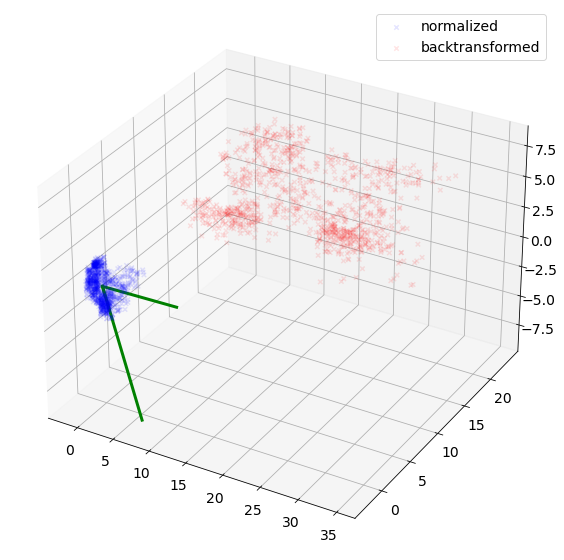

In [75]:
n = 3
fraction_variance_explained, principal_components, eigenvalues, normalized_data, backtransformed_data, pca_result = PCA_sklearn(selected_numerical_columns.values, n_components=n) 

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(normalized_data[:, 0], normalized_data[:, 1], normalized_data[:, 2], marker="x", color="b", alpha = 0.1, label = "normalized")
ax.scatter(backtransformed_data[:, 0], backtransformed_data[:, 1], backtransformed_data[:, 2], marker="x", color="r", alpha = 0.1, label = "backtransformed")

faktor_weil_sonst_kaum_sichtbar = 10
for i, (val, vec) in enumerate(zip(eigenvalues, principal_components)):
    x = vec * np.sqrt(val)*faktor_weil_sonst_kaum_sichtbar
    ax.plot([0, x[0]], [0, x[1]], [0, x[2]], color='g', lw=3)
    print(f"Eigenvector {i+1} starts at [0, 0, 0] and ends at {x}")

plt.tight_layout()
x_limits = ax.get_xlim()
y_limits = ax.get_ylim()

print("x-axis limits:", x_limits)
print("y-axis limits:", y_limits)
plt.legend()
plt.show()

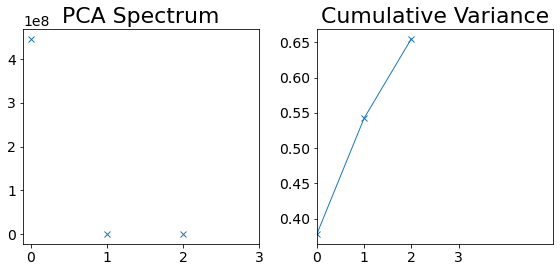

In [76]:
# Plot spectrum
fig = plt.figure(figsize=(8, 4))
fig.add_subplot(1, 2, 1)
plt.title("PCA Spectrum")
eigval = pca.explained_variance_

plt.plot(eigval, lw=0, marker="x")
plt.xticks(range(0,len(fraction_variance_explained)+1))

# Compute cumulative explained variance ratio
cumulative_var_ratio = np.cumsum(fraction_variance_explained)

fig.add_subplot(1, 2, 2)
plt.title("Cumulative Variance")
plt.plot(cumulative_var_ratio, lw=1, marker="x")
plt.xlim([0, 5])
plt.xticks(range(0,len(fraction_variance_explained)+1))
plt.tight_layout()

## t SNE

In [56]:
def plot_tsne(tsne_results, labels=['']):
    '''Plotting function for tSNE results, creates one or multiple plots of tSNE-transformed data.
       If the clustering is the original one (default), original cluster colors will be used. Otherwise,
       colors will be a random permutation.

    input:
        tsne_results: (n, 2)-shaped array containing tSNE-transformed data or list of such arrays
                      (output of the fit_transform function of sklearn tSNE)
        labels: optional, list of titles for the subplots
    '''

    if type(tsne_results) == list:  # make sure we can do both single and multiple plots
        # and are flexible regarding input
        num_plots = len(tsne_results)
    else:
        num_plots = 1
        tsne_results = [tsne_results]

    if len(labels) == 1:
        labels = labels * num_plots

    fig, ax = plt.subplots(num_plots, 1, figsize=(10, num_plots * 10))
    if num_plots == 1:
        ax.scatter(tsne_results[0][:, 0], tsne_results[0][:, 1], s=1)
        ax.set_title(labels[0])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_axis_off()
    else:
        for i in range(num_plots):
            ax[i].scatter(tsne_results[i][:, 0], tsne_results[i][:, 1], s=1)
            ax[i].set_title(labels[i])
            ax[i].set_xticks([])
            ax[i].set_yticks([])
            ax[i].set_axis_off()

In [57]:
tsne_default = TSNE(random_state=1)
tsne_results = tsne_default.fit_transform(selected_numerical_columns.values)

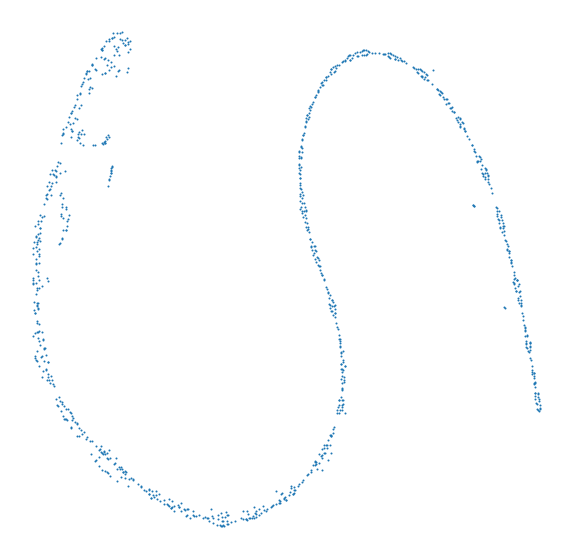

In [58]:
plot_tsne(tsne_results)

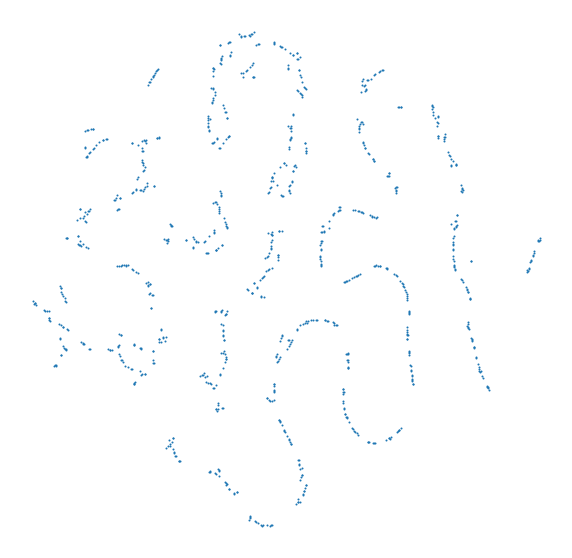

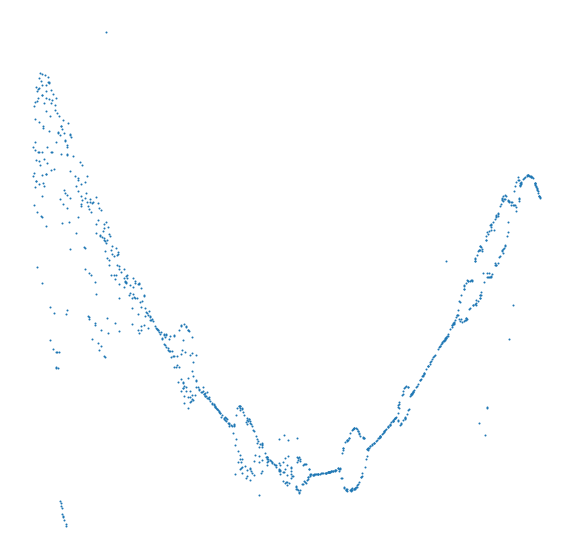

In [59]:
# perplexity = 5
tsne_5 = TSNE(perplexity=5, random_state=1)
tsne_results_5 = tsne_5.fit_transform(selected_numerical_columns.values)
plot_tsne(tsne_results_5)

# perplexity = 100 
tsne_100 = TSNE(perplexity=100, random_state=1) 
tsne_results_100 = tsne_100.fit_transform(selected_numerical_columns.values)
plot_tsne(tsne_results_100)



In [60]:
selected_numerical_columns

,Probability (%) of dying between age 30 and exact age 70 from illness (all),Suicides per 100000 (all),happiness_score,population density,latitude,longitude,GDP_per_person,gini_reported,temperature_change,birth_health,perception_corruption,social_support
0,18.30,8.60,6.31,13.33,-38.42,-63.62,6273.00,46.51,0.58,65.82,0.85,0.94
1,18.80,8.30,6.07,13.33,-38.42,-63.62,7756.00,46.14,-0.25,65.94,0.88,0.86
2,18.00,8.70,5.96,13.33,-38.42,-63.62,9753.00,44.40,0.57,66.06,0.86,0.89
3,17.80,8.40,6.42,13.33,-38.42,-63.62,8982.00,43.81,0.71,66.18,0.88,0.92
4,17.80,8.60,6.44,14.78,-38.42,-63.62,10307.00,42.91,0.12,66.30,0.85,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...
980,29.70,17.20,3.28,30.29,-19.02,29.15,447.00,74.60,0.22,41.60,0.95,0.83
981,32.10,20.10,3.17,30.29,-19.02,29.15,373.00,74.60,0.43,42.80,0.96,0.84
982,33.50,22.20,4.06,30.29,-19.02,29.15,817.00,74.60,-0.06,44.00,0.93,0.81
983,33.30,21.50,4.68,32.86,-19.02,29.15,938.00,74.60,1.03,45.20,0.83,0.86
